# Статистика, прикладной поток
## Практическое задание 3

В данном задании вы найдете оценки максимального правдоподобия по реальным данным для некоторых вероятностных моделей, посмотрите на свойства робастных оценок, исследуете оценки в схеме Бернулли, а также потренируетесь работать с библиотекой pandas.

**Правила:**

* Дедлайн **31 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[S19] Фамилия Имя - задание 3"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Правила оформления смотрите в презентации с первого практического занятия.
* При решении без доказательства можно пользоваться любыми теоретическими свойствами, которые были на лекциях или семинарах.
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  10 баллов **О2**
* Задача 2 -  7 баллов **О3**
* Задача 3 -  5 баллов **О3**
* Задача 4 -  15 баллов **О2**
* Задача 5a -  5 баллов **О2**
* Задача 5b -  10 баллов **О3**
* Задача 6 -  15 баллов **О3**
* Задача 7 -  20 баллов **О3**


In [1]:
import numpy as np
import scipy.stats as sps
from scipy.special import factorial
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(context="notebook")
%matplotlib inline

__________________
### Задача 1. Wine
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine и загрузите их с помощью библиотеки pandas.

In [2]:
# wine.data - соединение wine.data и wine.names
# добавил первую строку - названия колонок
wine = pd.read_csv("wine.data")

Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:** 
$$
\widehat{a} = \overline X
$$
$$
\widehat{\Sigma} = \frac{1}{n} \sum\limits_{i=1}^n (X_i - a) \cdot (X_i - a)^T
$$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue".
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

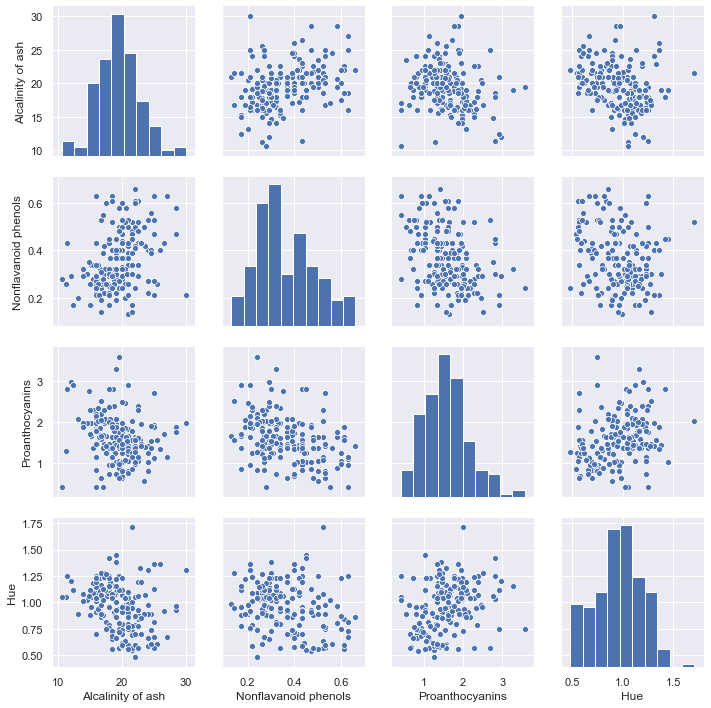

In [3]:
wine = wine[["Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue"]]
sns.pairplot(wine)

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке:

In [4]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    sample = np.array(sample)
    return sample.mean(axis=0)

In [5]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    sample = np.array(sample)
    return np.dot((sample - mle_for_mean(sample)).T, sample - mle_for_mean(sample)) / sample.shape[0]
    # return (np.array([np.dot(sample[i].reshape(len(sample[i]), 1) - mean.reshape(4, 1), (sample[i] - mean).reshape(1, len(sample[i])))
    #                 for i in range(len(sample))]).mean(axis=0))

In [6]:
mu = mle_for_mean(wine.values)
sigma = mle_for_covariance_matrix(wine.values)
print(mu)
print(sigma)

[19.49494382  0.36185393  1.59089888  0.95744944]
[[ 1.10900306e+01  1.49576790e-01 -3.75057253e-01 -2.07943233e-01]
 [ 1.49576790e-01  1.54016191e-02 -2.59134642e-02 -7.42920401e-03]
 [-3.75057253e-01 -2.59134642e-02  3.25754248e-01  3.84473488e-02]
 [-2.07943233e-01 -7.42920401e-03  3.84473488e-02  5.19514497e-02]]


Визуализируйте полученный результат. Для каждой пары признаков постройте график, на котором будут:

1) Точки выборки.

2) Плотность нормального распредления с оцененными параметрами в виде линий уровня.

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

In [7]:
def plot_norm_dependence(first, second, mu, sigma, num_subplot, first_label, second_label):
    plt.subplot(3, 2, num_subplot)
    grid = np.mgrid[first.min() - 1:first.max() + 1:(first.max() - first.min() + 2)/100,
                    second.min() - 1:second.max() + 1:(second.max() - second.min() + 2)/100]
    dots_for_density = np.dstack([grid[0], grid[1]])
    
    # ниже медленный способ, на память
    # density = np.array([[sps.multivariate_normal(mean=mu, cov=sigma).pdf((grid[0][i][j], grid[1][i][j]))
    #                   for j in range(grid[0].shape[1])]
    #                   for i in range(grid[0].shape[0])]) 
    
    density = sps.multivariate_normal(mean=mu, cov=sigma).pdf(dots_for_density)
    
    plt.pcolormesh(grid[0], grid[1], density, cmap=plt.cm.Oranges)
    
    plt.scatter(first, second, alpha=0.4, color='blue', label="Точки выборки")
    
    # нарисовать указанные линии уровня
    CS = plt.contour(grid[0], grid[1], density)
    plt.clabel(CS)
    
    plt.xlim((first.min() - 0.1, first.max() + 0.1))
    plt.ylim((second.min() - 0.1, second.max() + 0.1))
    
    plt.xlabel(first_label)
    plt.ylabel(second_label)
    plt.title("Совместное распредедение {} и {}".format(first_label, second_label))
    
    plt.legend()

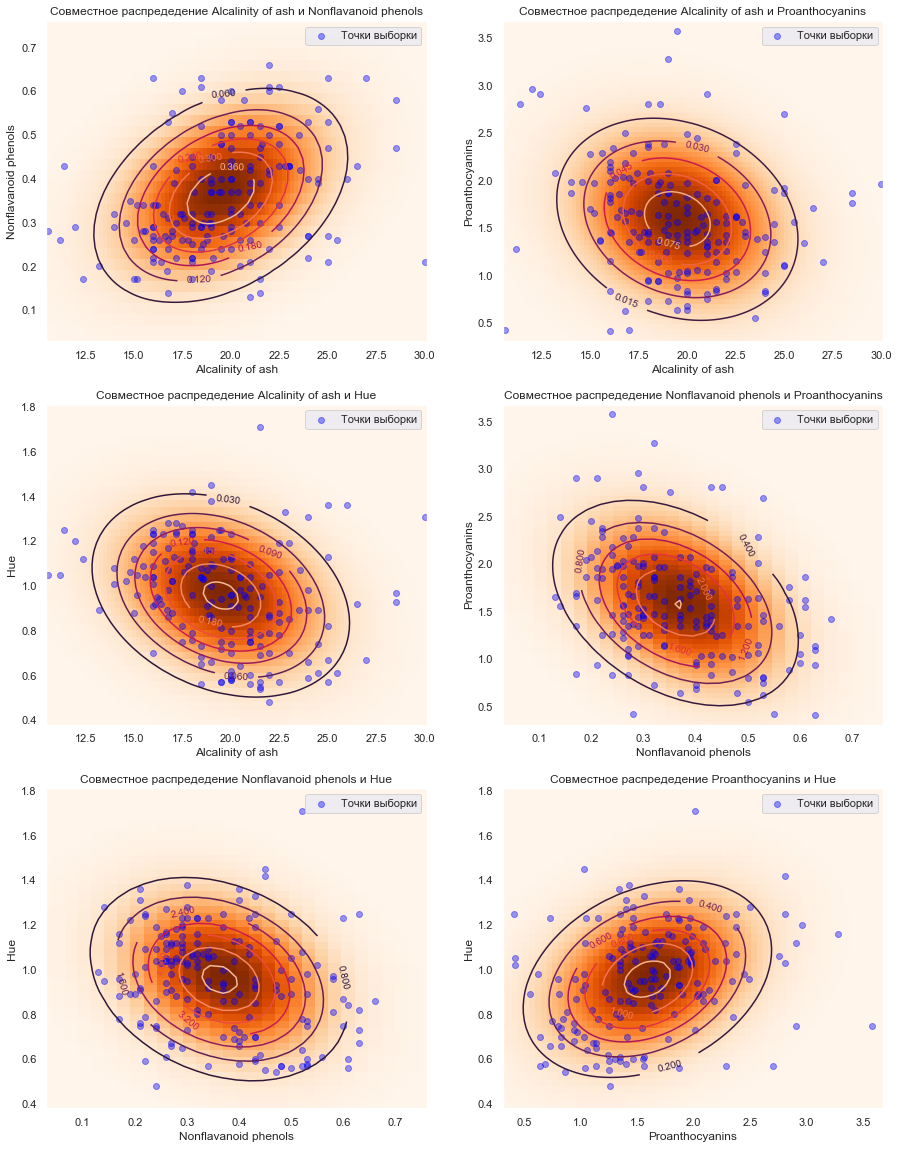

In [8]:
plt.figure(figsize = (15, 20))
num_subplot = 0
for i in range(4):
    for j in range(4):
        if (i < j):
            num_subplot += 1
            plot_norm_dependence(wine.values[:, [i]], wine.values[:, [j]], mu[[i, j]],
                                 sigma[[[i], [j]], [i, j]], num_subplot,
                                 wine.columns.values[i], wine.columns.values[j])

**Выводы:** Отмечу, что у линии уровня заходятся точки с близкой плотностью. Посмотрев на графики, видно, что больше всего точек находится в центре, а центр совпадает с ОМП матожидания.  
Можно сделать вывод, что распределение наших точек хорошо описывается нормальным распределением с вычисленными параметрами с помощью ОМП.

__________________
### Задача 2. Airquality

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [9]:
airquality = pd.read_csv("airquality.csv")
airquality

Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]

Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [10]:
main_air = airquality.iloc[:, 0:4]
main_air_names = main_air.columns
main_air.describe()

Ozone     Solar.R        Wind        Temp
count  116.000000  146.000000  153.000000  153.000000
mean    42.129310  185.931507    9.957516   77.882353
std     32.987885   90.058422    3.523001    9.465270
min      1.000000    7.000000    1.700000   56.000000
25%     18.000000  115.750000    7.400000   72.000000
50%     31.500000  205.000000    9.700000   79.000000
75%     63.250000  258.750000   11.500000   85.000000
max    168.000000  334.000000   20.700000   97.000000

Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** В столбцах Ozone, Solar.R выборочная медиана значительно отличается от выборочного среднего, хоть по ЦПТ должна бы сходиться. Значит, в этих измерениях присутствуют выбросы.

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

In [11]:
print("Наименьший рассматриваемый месяц: {}".format(int(airquality.Month.describe()["min"])))
print("Наибольший рассматриваемый месяц: {}".format(int(airquality.Month.describe()["max"])))

Наименьший рассматриваемый месяц: 5
Наибольший рассматриваемый месяц: 9


Теперь видим, что месяца рассматриваются с $5$ по $9$.

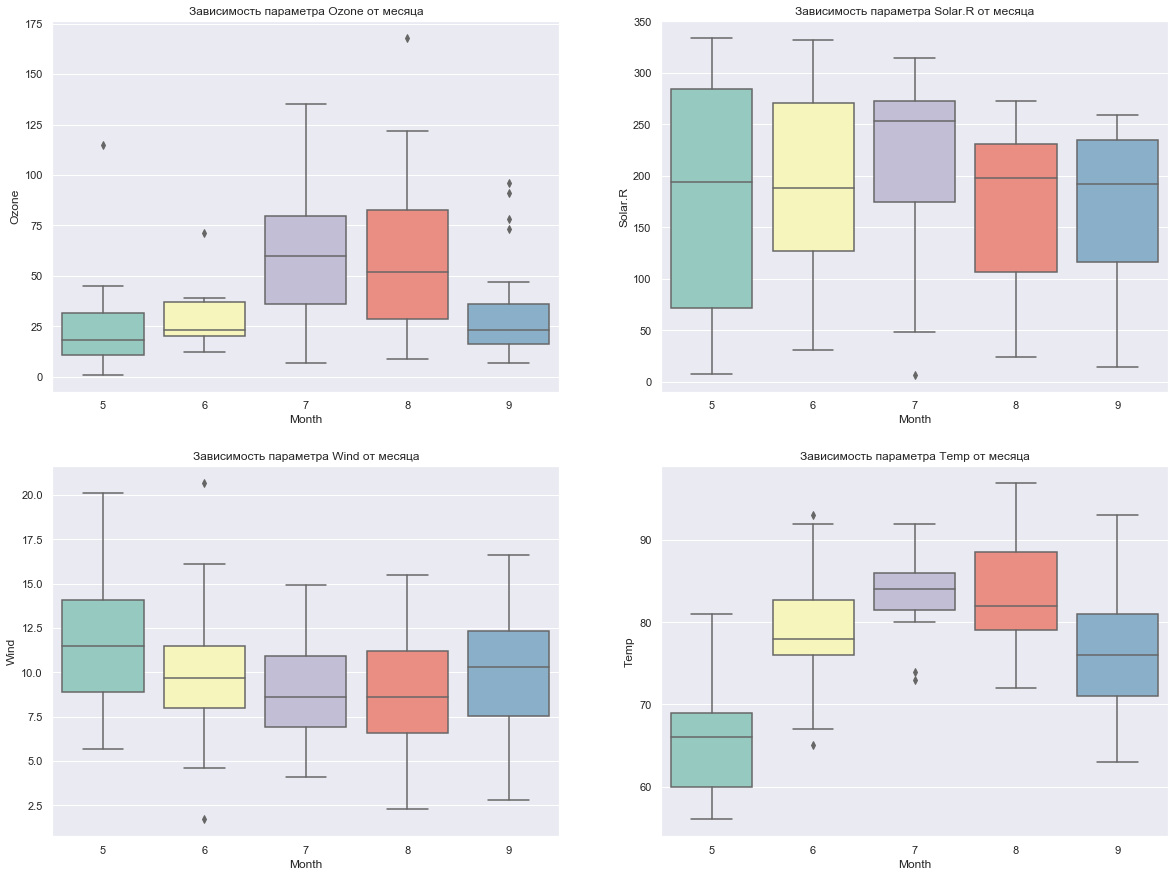

In [12]:
plt.figure(figsize=(20, 15))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Month', y=main_air_names[i], data=airquality, palette='Set3')
    plt.title("Зависимость параметра {} от месяца".format(main_air_names[i]))

Какую информацию показывают ящики с усами? Какие выводы можно сделать в данном случае?

**Ответ:** Ящик с усами показывает медиану, $0.25$ и $0.75$ квантили переменной, поданной как y (как раз наш параметр). Также он показывает возможные выбросы, наглядно мы можем видеть их как точки, находящиеся вне усов. Усы же сделаны как наименьшее число, превосходящее $Q1 - 1.5 \cdot (Q3-Q1)$ и наибольшее, меньше чем $Q3 + 1.5 \cdot (Q3-Q1)$, где $Q3$ - $0.75$ квантиль, $Q1$ - $0.25$ квантиль.  
Нам видно, что выбросы есть в каждом из параметром, но больше всего их в параметре Ozone. Также, стоит признать, что мое предположение насчет количества выбросов в Solar.R было не совсем верно, выбросов, определенных подобным способом, в нем не так уж и много.

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее 
- выборочную медиану
- медиану средних Уолша.

Вычисление медианы средних Уолша без циклов будет поощряться.  
**Подсказки:** 
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?
2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`

Как говорилось ранее, параметр с наибольшим количеством выбросов - Ozone. Рассматриваем статистики для него.

In [13]:
def get_W(values):
    indices = np.triu_indices_from(values + values.reshape(-1, 1)) # получили индексы верхнего треугольника
    sums_of_two = values + values.reshape(-1, 1) # получили матрицу попарных сумм
    return np.nanmedian(sums_of_two[indices[0], indices[1]] / 2)

In [14]:
ozone = main_air.Ozone
print("Выборочно среднее: {}".format(ozone.mean()))
print("Выборочная медиана: {}".format(ozone.median()))
print("Медиана средних Уолша: {}".format(get_W(np.array(ozone))))

Выборочное среднее: 42.12931034482759
Выборочная медиана: 31.5
Медиана средних Уолша: 38.5


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** различия вызваны свойством робастности.  
Как мы знаем, выборочное среднее плохо устойчиво к выбросам (совсем-совсем плохо).  
Медиана и медиана средних Уолша же более устойчивы (их толерантность $ > 0.29$)

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** Вряд ли. Логично предполагать, что количество озона сегодня зависит от озона в предыдущие дни - ведь не может он просто испариться, правда? Зависимость между измерениями есть.

**Бонус:** А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете в весеннем семестре, но задуматься и порассуждать полезно уже сейчас.

Как подсказывает наш пример, не часто.  
Многие теоремы опираются на независимость, а при зависимости они могут нарушаться.  
Отсюда предположение, что, использовав теорему (например, ЦПТ), и получив какой-то странный результат мы должны задуматься о зависимости величин.  
Количественные меры - например, как в теорвере - коэффициент корреляции.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределенных случайных величин в реальном мире.


**Вывод:** Методы визуального анализа (в данном случае с помощью pairplot и boxplot) помогли нам проверить предположение о распределии наших признаков, а так же оценить разброс значений и количество выбросов в данных. Робастные статистики показывают более верный результат в случае, когда присутствуют выбросы - они менее чувствительны к ним. Но при этом даже робастные оценки (медиана и медиана Уолша) отличаются друг от друга, и сразу непонятно, какая из них правдивее. А так как мы хотим получить правдивый результат, то это важно.  
В нашем мире все взаимосвязано, полностью независимого и полностью одинако распределенного в природе не существует.

__________________
### Задача 3. Laplace

Предлагается изучить некоторые свойства распределения Лапласа с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{2} e^{- |x - \theta|}$.

**1.** На отрезке $[-4, 4]$ постройте плотность стандартного нормального распределения и стандартного распределения Лапласа ($\theta = 0$). Не забудьте добавить легенду.

**Решение:**

[]

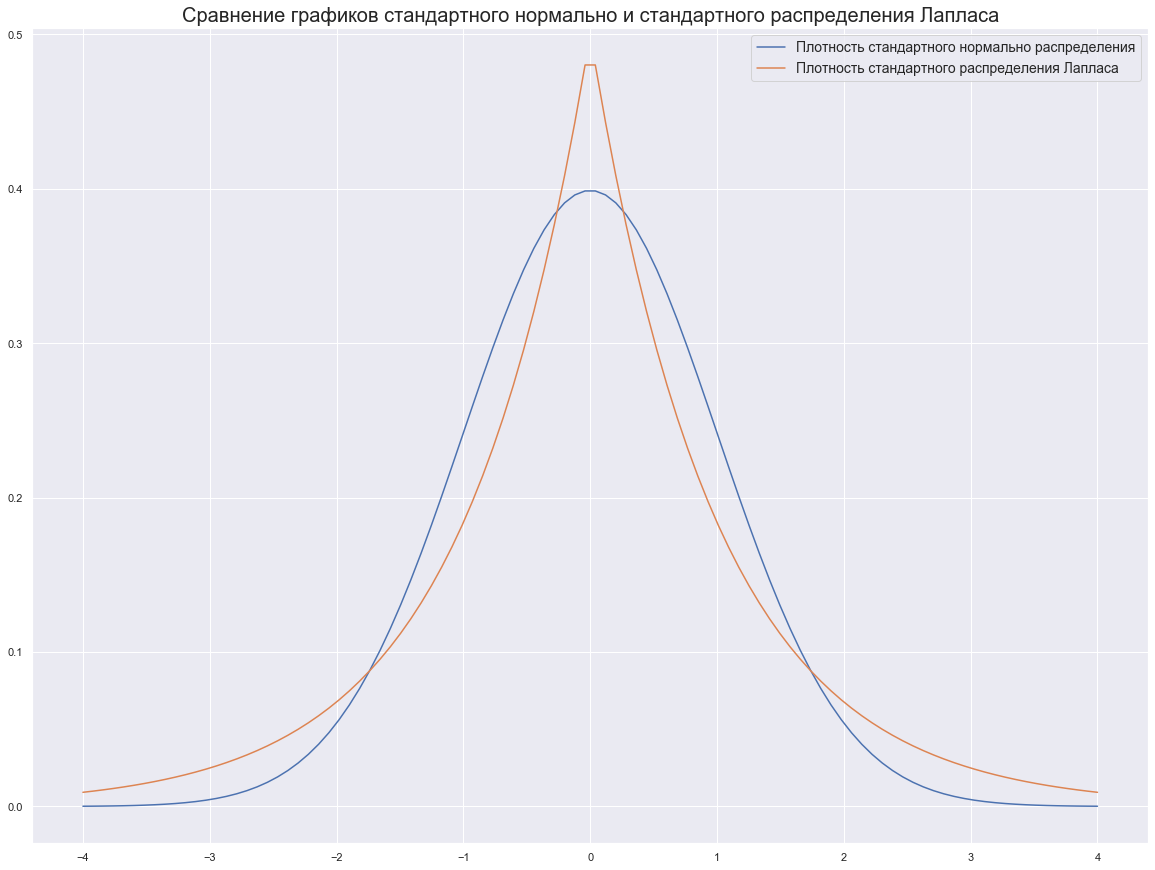

In [15]:
x = np.linspace(-4, 4, 100)
plt.figure(figsize=(20, 15))
plt.plot(x, sps.norm.pdf(x, 0, 1), label="Плотность стандартного нормально распределения")
plt.plot(x, sps.laplace.pdf(x, 0, 1), label="Плотность стандартного распределения Лапласа")
plt.title("Сравнение графиков стандартного нормально и стандартного распределения Лапласа", fontsize=20)
plt.legend(fontsize=14)
plt.plot()

**Вывод:**  Они достаточно похожи, но распределение Лапласа медленнее сходится к нулю, а значит больше точек, сильно отклоненных от центра.

**2.** 
Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Лапласа. Помочь в ее вычислении может теорема, упомянутая на лекциях.

Является ли эта функция монотонной? Найдите пределы функции при $\alpha \to+ 0$ и $\alpha \to 1/2 - 0$. Сравните со значениями асимптотической дисперсии для выборочного среднего и выборочной медианы (не забудьте отметить их на графике). Сделайте вывод.

Асимптотическая дисперсия ищется по такой формуле:
$$
\sigma_\alpha^2 = \frac{2}{(1 - \alpha)^2} \cdot (1 + \alpha \cdot u_{1-\alpha}^2 - \frac{1}{2} \cdot e^{-u_{1-\alpha}} \cdot (u_{1-\alpha}^2 + 2 \cdot u_{1-\alpha} + 2))
$$
Асимптотическая дисперсия для выборочного среднего: $\sigma_{\overline X}^2 = 2$  
Асимптотическая дисперсия для выборочной медианы: $\sigma_{\widehat{\mu}}^2 = 1$

**Решение:**

In [16]:
def laplace_variance(alpha):
    q = sps.laplace.ppf(1 - alpha) # получили (1-alpha)-квантиль, он как раз нужен для вычисления.
    var = 2 / (1 - 2*alpha)**2 * (1 + alpha * q**2 - 1/2 * np.exp(-q)*(q**2 + 2*q + 2))
    return var

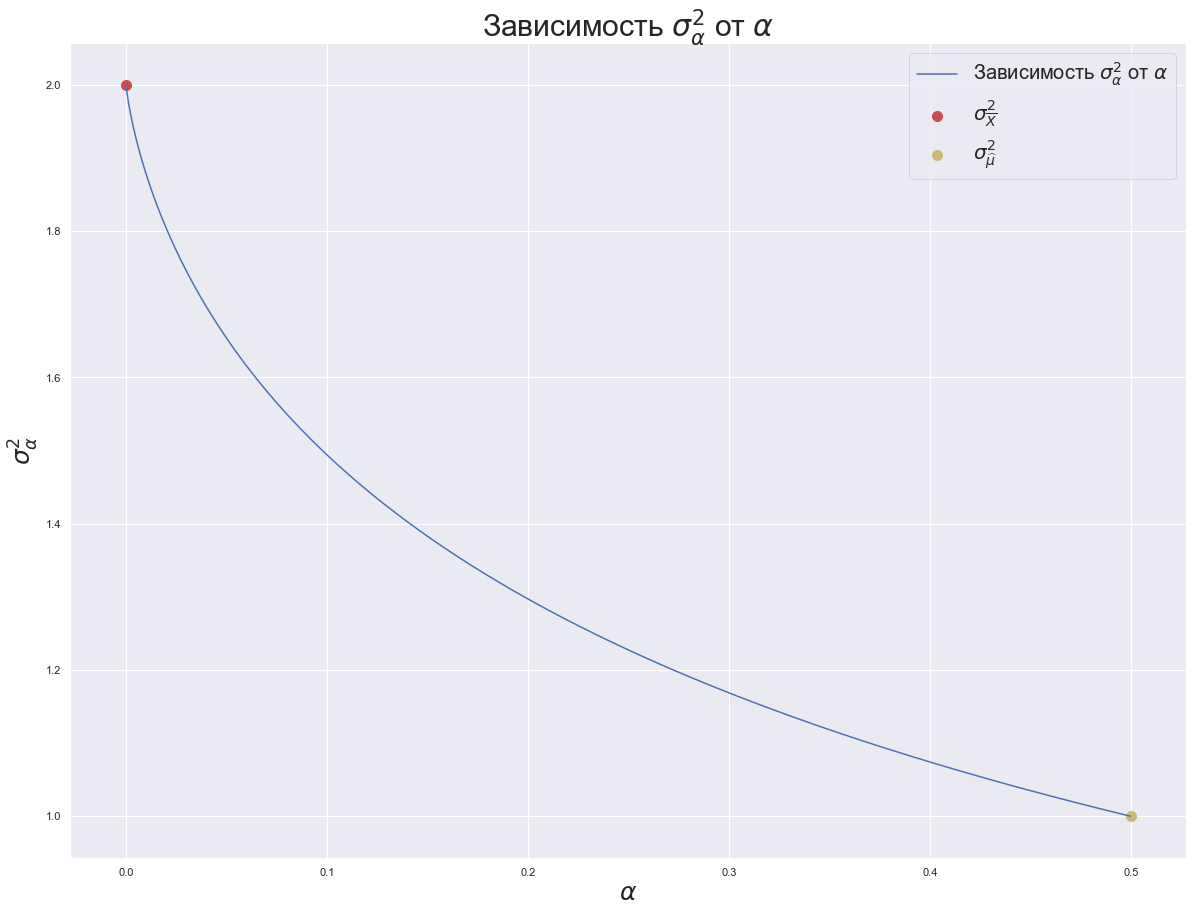

In [17]:
plt.figure(figsize=(20, 15))
alpha = np.linspace(0.0001, 0.4999, 1000)

plt.plot(alpha, laplace_variance(alpha), label=r"Зависимость $\sigma_\alpha^2$ от $\alpha$")
plt.scatter(0, 2, s=100, color='r', label=r"$\sigma_{\overline{X}}^2$")
plt.scatter(0.5, 1, s=100, color='y', label=r"$\sigma_{\widehat{\mu}}^2$")

plt.title(r"Зависимость $\sigma_\alpha^2$ от $\alpha$", fontsize=30)
plt.xlabel(r"$\alpha$", fontsize=25)
plt.ylabel(r"$\sigma_\alpha^2$", fontsize=25)
plt.legend(fontsize=20)

plt.show()

**Вывод:** Как видно из графика, $\sigma_\alpha^2$ - монотонная функция. Ее предел при $\alpha \to+ 0$ равен 2 и совпадает с асимптотической дисперсией выборочного среднего, а при $\alpha \to 1/2 - 0$ равен единице и совпадает с асимтотической дисперсией выборочной медианы.

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Лапласа. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша.

На одном графике изобразите зависимость значений этих оценок от $n$. Настройте видимую область графика по оси y так, чтобы четко была отображена информативная часть графика.  Сделайте вывод.

**Решение:**

In [18]:
def cum_walsh(sample):
    sums_of_two = sample + sample.reshape(-1, 1)
    result = np.zeros(len(sample))
    for i in range(len(sample)):
        indices = np.triu_indices_from(np.eye(i + 1)) # получили индексы верхнего треугольника
        result[i] =  np.median(sums_of_two[indices[0], indices[1]] / 2)
    return result

[]

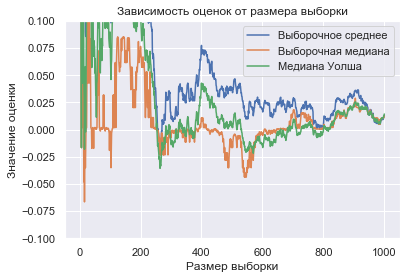

In [19]:
sample = sps.laplace.rvs(size=1000)
x = np.linspace(1, 1000, 1000)

sample_cummean = sample.cumsum() / x
sample_cummedian = pd.Series(sample).expanding().median() # Почему такой функции нет в numpy...
sample_cumwalsh = cum_walsh(sample)

plt.plot(x, sample_cummean, label='Выборочное среднее')
plt.plot(x, sample_cummedian, label='Выборочная медиана')
plt.plot(x, sample_cumwalsh, label='Медиана Уолша')

plt.ylim((-0.1, 0.1))
plt.ylabel("Значение оценки")
plt.xlabel("Размер выборки")
plt.title("Зависимость оценок от размера выборки")
plt.legend()

plt.plot()

**Вывод:** Мы знаем, что оценки должны сходиться к матожиданию. Но графики при выборке размера 1000 не могут нас в этом полностью удостоверить. Графики же размера 10000 я на своем ноутбуке построить не смог. Но этому есть объяснение: как указано в пункте 1, плотность распределения Лапласа в точках, отдаленных от матожидания медленнее стремится к нулю, чем у нормального. Такие точки и вносят погрешность.

__________________
### Задача 4. Gamma-cats (Cauchy)

Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi (1 + (x- \theta)^2)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

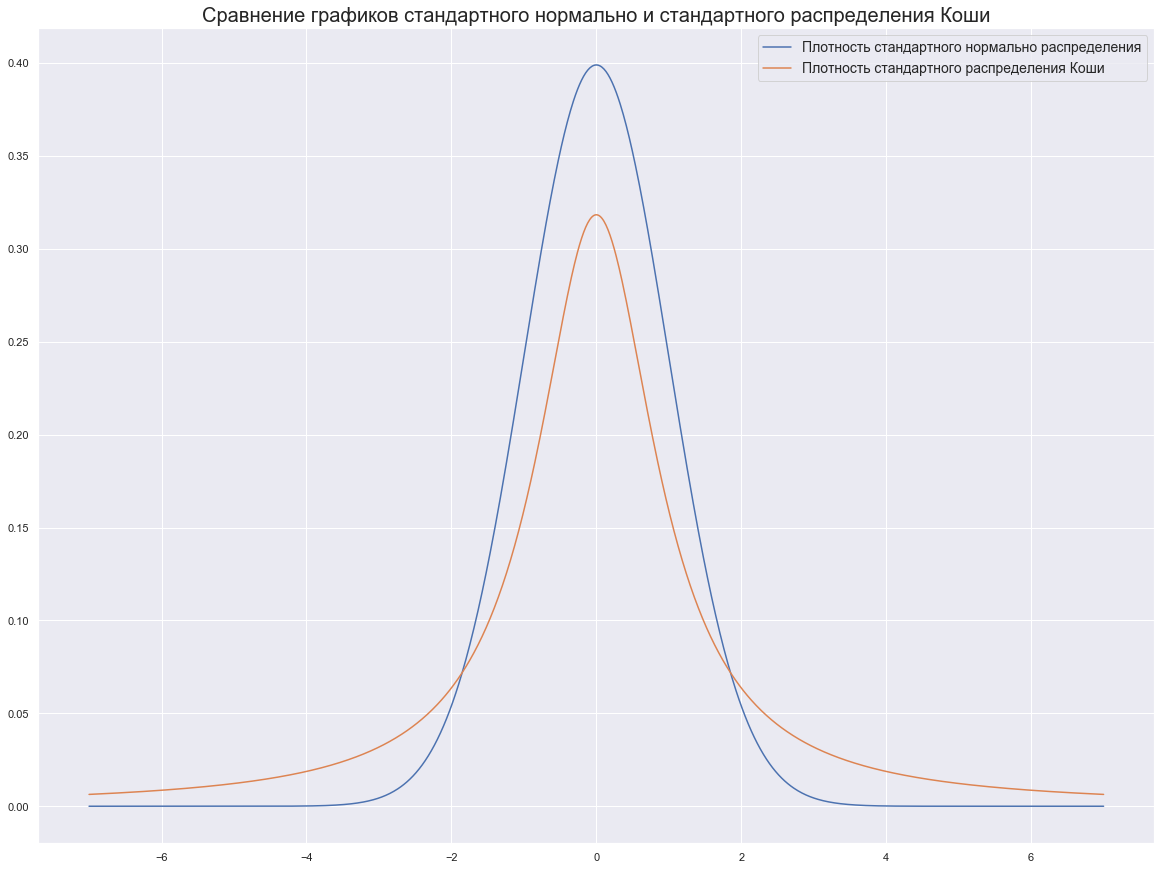

In [377]:
x = np.linspace(-7, 7, 1000)
plt.figure(figsize=(20, 15))
plt.plot(x, sps.norm.pdf(x, 0, 1), label="Плотность стандартного нормально распределения")
plt.plot(x, sps.cauchy.pdf(x, 0, 1), label="Плотность стандартного распределения Коши")
plt.title("Сравнение графиков стандартного нормально и стандартного распределения Коши", fontsize=20)
plt.legend(fontsize=14)
plt.show()

**Вывод:** Как и в прошлом задании, графики достаточно похожи, распределение Коши медленнее сходится к нулю, при этом плотность точек в центре меньше, чем у нормального.

**2.** 
Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Коши. Помочь в ее вычислении может теорема, упомянутая на лекциях.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте минимум функции.

Асимптотическая дисперсия ищется по такой формуле:
$$
\sigma_\alpha^2 = \frac{2}{(1 - \alpha)^2} \cdot (\alpha \cdot u_{1-\alpha}^2 + \frac{u_{1-\alpha} - arctg(u_{1-\alpha})}{\pi})
$$

**Решение:**

In [21]:
def cauchy_variance(alpha):
    if alpha.any() > 1:
        return 999
    q = sps.cauchy.ppf(1 - alpha)
    var = 2 / (1 - 2*alpha)**2 * (alpha * q**2 + (q - np.arctan(q))/np.pi)
    return var

Точка минимума: 0.38031451422693124. Значение в точке минимума: 2.2776450446925187


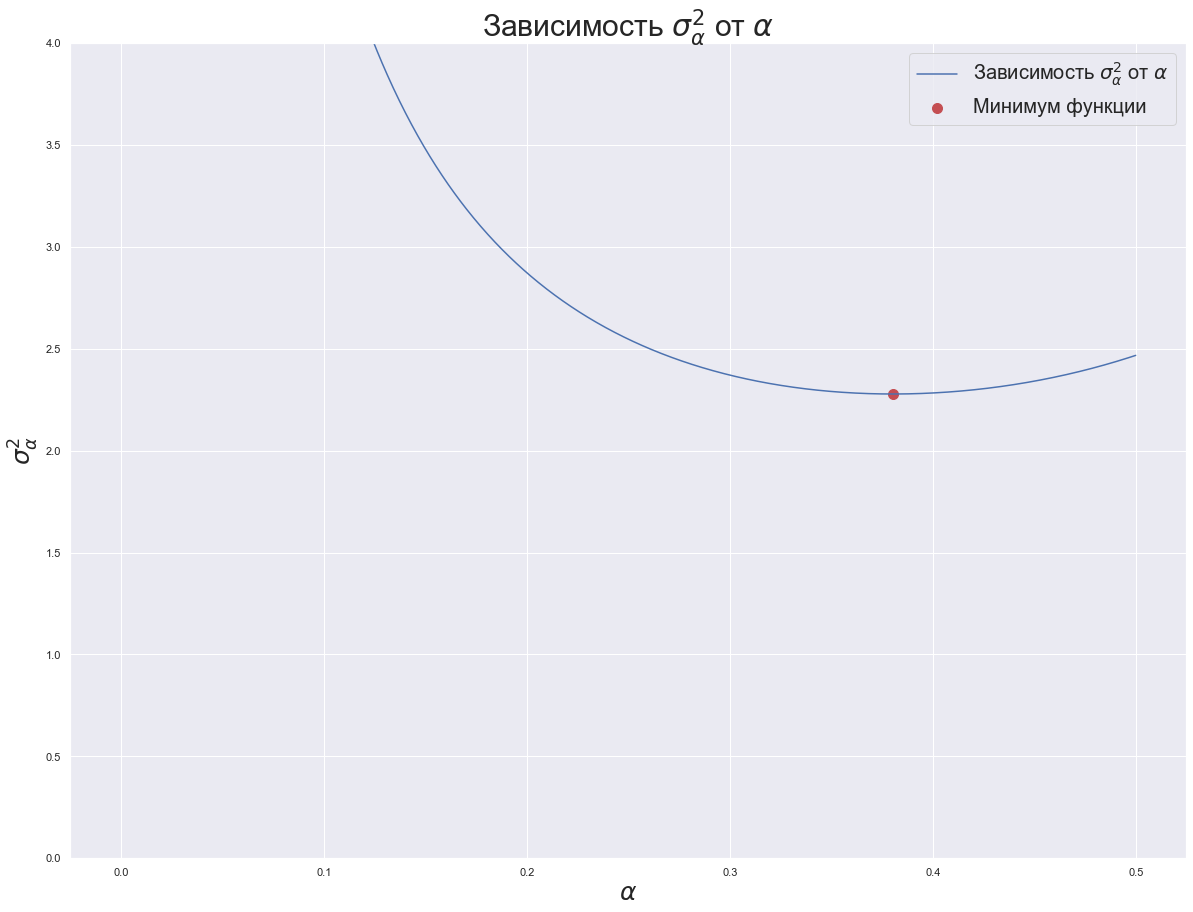

In [22]:
from scipy.optimize import minimize

alpha = np.linspace(0.0001, 0.4999, 1000)

plt.figure(figsize=(20, 15))

plt.plot(alpha, cauchy_variance(alpha), label=r"Зависимость $\sigma_\alpha^2$ от $\alpha$")
plt.title(r"Зависимость $\sigma_\alpha^2$ от $\alpha$", fontsize=30)
plt.xlabel(r"$\alpha$", fontsize=25)
plt.ylabel(r"$\sigma_\alpha^2$", fontsize=25)

plt.ylim((0, 4))
x_min = minimize(cauchy_variance, x0=(0.1), bounds=((0.1,0.4), )).x # функция хорошая, отработает правильно
plt.scatter(x_min, cauchy_variance(x_min), s=100, color='r', label='Минимум функции')
print("Точка минимума: {}. Значение в точке минимума: {}".format(float(x_min), float(cauchy_variance(x_min))))
plt.legend(fontsize=20)
plt.show()

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна?

**Ответ:** При $\alpha =  0.38$
Она равна: $2.27$

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша;

а также, по каждой из этих оценок, одношаговую оценку.

**Напоминание:** если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(l''_X(\widehat{\theta}_0) \right)^{-1} l'_X(\widehat{\theta}_0)$, где $l_X(\theta)$ — логарифмическая функция правдоподобия. Заметим, что обычное выборочное среднее не является асимптотически нормальной оценкой, и оценка, вычисленная по формуле выше, формально не является одношаговой, однако ее все равно требуется посчитать.

На одном графике изобразите зависимость значений этих оценок от $n$. Для каждой оценки $\widehat{\theta}_0$ соответствующая оценка $\widehat{\theta}_1$ должна быть изображена на графике пунктиром тем же цветом, что и $\widehat{\theta}_0$. Сделайте вывод.

**Замечание:** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие.

**Решение:**

In [23]:
def first_derivative_l_cauchy(theta0, sample):
    return 2*((sample - theta0)/(1 + (sample - theta0)**2)).sum()

def second_derivative_l_cauchy(theta0, sample):
    return 2*(((sample - theta0)**2 - 1) / (1 + (sample - theta0)**2)**2).sum()

In [24]:
def plot_estimate_with_first_precision(sample, x, fx, color, label):
    first_precision = np.zeros(len(fx))
    for i in range(len(fx)):
        first_precision[i] = (fx[i] - first_derivative_l_cauchy(fx[i], sample[0:i+1]) / 
                                        second_derivative_l_cauchy(fx[i], sample[0:i+1]))
    plt.plot(x, fx, color=color, label=label)
    plt.plot(x, first_precision, color=color, linestyle='--', label=(label + " первое приближение"))

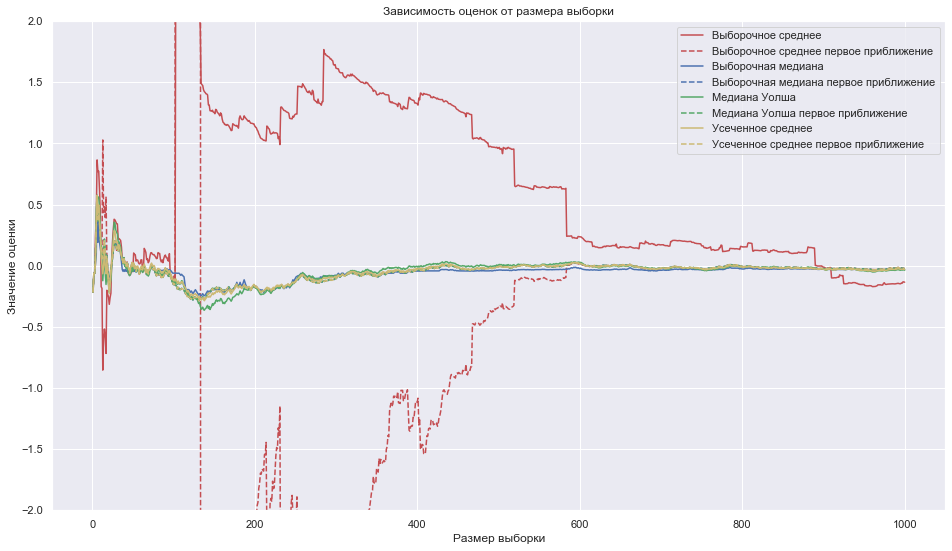

In [25]:
from scipy.stats import trim_mean

plt.figure(figsize=(16, 9))
sample = sps.cauchy.rvs(size=1000)
x = np.linspace(1, 1000, 1000)

sample_cummean = sample.cumsum() / x
sample_cummedian = pd.Series(sample).expanding().median() # Почему такой функции нет в numpy...
sample_cumwalsh = cum_walsh(sample)
sample_tmean = [trim_mean(sample[0:i], 0.38) for i in range(1, 1001)]

plot_estimate_with_first_precision(sample, x, sample_cummean, color='r', label='Выборочное среднее')
plot_estimate_with_first_precision(sample, x, sample_cummedian, color='b', label='Выборочная медиана')
plot_estimate_with_first_precision(sample, x, sample_cumwalsh, color='g', label='Медиана Уолша')
plot_estimate_with_first_precision(sample, x, sample_tmean, color='y', label='Усеченное среднее')

plt.ylim((-2, 2))
plt.ylabel("Значение оценки")
plt.xlabel("Размер выборки")
plt.title("Зависимость оценок от размера выборки")
plt.legend()
plt.show()

Как видно, выборочное среднее и его первое приближение достаточно плохо сходятся к $0$ и мешают рассмотреть различия между графиками.

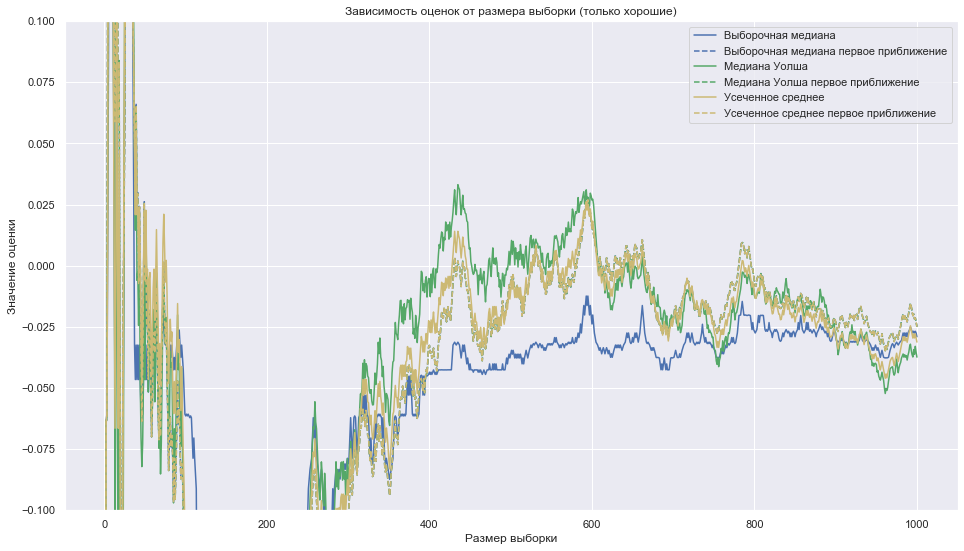

In [26]:
plt.figure(figsize=(16, 9))
plot_estimate_with_first_precision(sample, x, sample_cummedian, color='b', label='Выборочная медиана')
plot_estimate_with_first_precision(sample, x, sample_cumwalsh, color='g', label='Медиана Уолша')
plot_estimate_with_first_precision(sample, x, sample_tmean, color='y', label='Усеченное среднее')

plt.ylim((-0.1, 0.1))
plt.ylabel("Значение оценки")
plt.xlabel("Размер выборки")
plt.title("Зависимость оценок от размера выборки (только хорошие)")
plt.legend()
plt.show()

**Вывод:** Заметим, $\overline{X}$ никуда не сходится (матожидания же у случайной величины, имеющей распределение Коши, не существует). Его первое приближение так же никуда не сходится.  
Остальные же оценки и их первые приближения сходятся к нулю. Они асимптотически нормальные, как и их приближения - так и должно быть.

__________________
### Задача 5. Weather
На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенератора сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность:
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k} I \{x \geq 0\},$$
где $\theta = (k, \lambda)$ &mdash; двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится.  В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

За распределение Вейбулла отвечает класс `weibull_min` из модуля `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

*Выборка:*  Создайте выборку по значениям среднесуточной скорости ветра на некоторой местности для нескольких лет (не менее трех).  Выборку можно получить <a href="http://www.atlas-yakutia.ru/weather/wind/climate_russia-III_wind_2018.html">отсюда</a>, используя скрипт `script.py`. Откройте командную строку в той же папке, запустите скрипт (`python3 script.py`) и следуйте инструкциям; на вопрос `Pick data type:` надо ответить `5`, чтобы выбрать данные по ветру. В полученном csv-файле надо выбрать данные (столбец `Mean`) за некоторый промежуток времени.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

Двумерную сетку можно создать с помощью функции `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, затем сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать трехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [27]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

**Решение:**

In [199]:
sample = pd.read_csv("1.csv").dropna(subset=['Mean', ]).Mean

Введем разумные границы значения параметров:

In [29]:
min_k = 0.0001
max_k = 10**4

min_l = 0.0001
max_l = 10**4

In [30]:
def find_mle_weibull(sample, f_left, f_right, s_left, s_right):
    while np.abs(f_right - f_left) + np.abs(s_right - s_left) > 0.00001:
        f_step = (f_right - f_left) / 100
        s_step = (s_right - s_left) / 100
        F, S = np.mgrid[f_left:f_right:f_step, s_left:s_right:s_step]

        log_f_mle = sps.weibull_min(c=F[:,:, None], scale=S[:,:, None]).logpdf(sample).sum(axis=-1)
        F_max = F[cool_argmax(log_f_mle)]
        S_max = S[cool_argmax(log_f_mle)]
        
        f_right = min(10000, F_max + f_step)
        f_left = max(0.0001, F_max - f_step)
        
        s_right = min(10000, S_max + s_step)
        s_left = max(0.0001, S_max - s_step)
    return (f_left, s_right)       

Мой компьютер не позволяет посчитать в этом ноутбуке ОМП для всей выборки, посчитаю для первых 500:

In [204]:
%%time
estimates = find_mle_weibull(sample[0:500], min_k, max_k, min_l, max_l)

/home/egor/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1825: RuntimeWarning: overflow encountered in power
  return np.log(c) + sc.xlogy(c - 1, x) - pow(x, c)


CPU times: user 3.81 s, sys: 445 ms, total: 4.26 s
Wall time: 4.25 s


И увижу, что найденные значения правда описывают выборку размера 500.

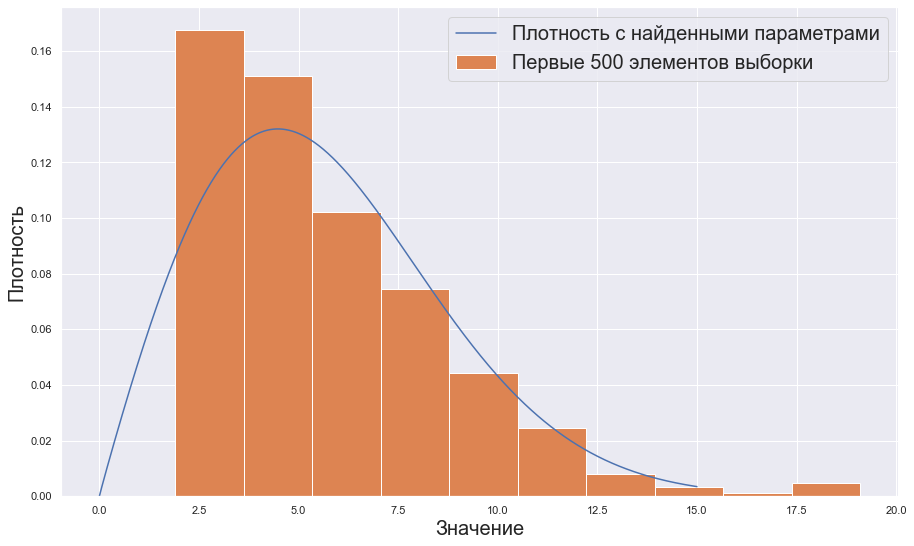

In [211]:
x = np.linspace(0, 15, 1000)
plt.figure(figsize=(15, 9))
plt.plot(x, sps.weibull_min(c=estimates[0], scale=estimates[1]).pdf(x), label="Плотность с найденными параметрами")
plt.hist(sample[0:500], density=True, bins=10, label="Первые 500 элементов выборки")
plt.xlabel("Значение", fontsize=20)
plt.ylabel("Плотность", fontsize=20)
plt.legend(fontsize=20)
plt.show()

Но нас же интересует значение параметров для всей выборки!  
Истинное же значение параметров для всей выборки посчитал в google colaboratory, оно получилось равным (1.93, 5.70)

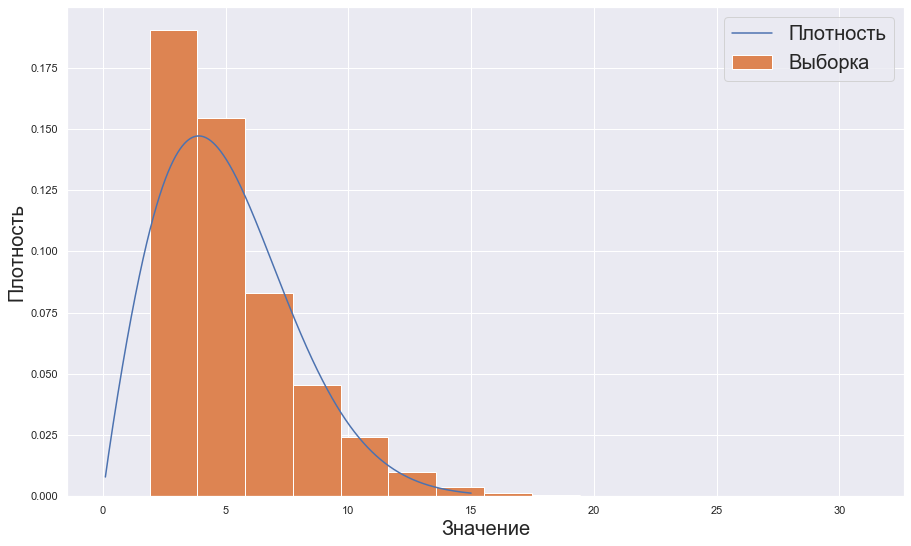

In [212]:
x = np.linspace(0.1, 15, 1000)
plt.figure(figsize=(15, 9))
plt.plot(x, sps.weibull_min(c=1.93, scale=5.7).pdf(x), label="Плотность")
plt.hist(sample, density=True, bins=15, label="Выборка")
plt.xlabel("Значение", fontsize=20)
plt.ylabel("Плотность", fontsize=20)
plt.legend(fontsize=20)
plt.show()

*b).* Обозначим $\widehat{\theta} = \left(\widehat{\lambda}, \widehat{k}\right)$ &mdash; ОМП. Запишите уравнение правдоподобия (все частные производные в точке экстремума логарифмической функции правдоподобия должны быть равны $0$). Используя одно из равенств, можно выразить $\widehat{\lambda}$ через значения $X_1, \dots, X_n, \widehat{k}$; подставив это выражение в другое равенство, получить уравнение на $\widehat{k}$. Решите это уравнение приближенно с помощью метода Ньютона и получите $\widehat{k}$, а значит, и $\widehat{\lambda}$.

**Решение:**

Известно, что если в методе Ньютона изначально взять асимптотически нормальную оценку ($k_0$), то каждая последующая будет тоже асимптотически нормальной. Конкретно для этого распределения это сделать сложно - медиана, среднее зависят от обоих параметров, а значит через ЦПТ, или же теорему про выборочную медиану как а.н.о. оценить именно $k$ не получится.  
Не отчаиваемся и надеемся, что метод сойдется в нужную точку.

Функция правдоподобия:

$$
l_X(\theta) = (k - 1) \cdot \sum\limits_{i=1}^{n} \ln{X_i} + n \cdot \ln{k} - n \cdot k \cdot \ln{\lambda} - \frac{\sum\limits_{i=1}^{n}X_i^k}{\lambda^k}
$$

Уравнения правдоподобия:
$$
\frac{\partial l_X(\theta)}{\partial k} = \sum\limits_{i=1}^{n} \ln{X_i} + \frac{n}{k} - n \cdot \ln{\lambda} - \frac{\sum\limits_{i=1}^{n}X_i^k \cdot \ln{X_i}}{\lambda^k} + \frac{\sum\limits_{i=1}^{n}X_i^k \cdot \ln{\lambda}}{\lambda^k} = 0
$$
$$
\frac{\partial l_X(\theta)}{\partial \lambda} = - \frac{n \cdot k}{\lambda} + k \cdot \frac{\sum\limits_{i=1}^{n}X_i^k}{\lambda^{k+1}} = 0
$$

Выразим $\lambda$ через $k$ из второго уравнения:
$$
\lambda = (\frac{1}{n} \cdot \sum\limits_{i=1}^{n}X_i^k)^{\frac{1}{k}}
$$

Подставим в выражение для первой производной:
$$
\frac{\partial l_X(\theta)}{\partial k} = \sum\limits_{i=1}^{n} \ln{X_i} + \frac{n}{k} - n \cdot \frac{\sum\limits_{i=1}^{n}X_i^k \cdot \ln{X_i}}{\sum\limits_{i=1}^{n} X_i^k}
$$

Найдем вторую производную по $k$:
$$
\frac{\partial^2 l_X(\theta)}{\partial k \cdot \partial k} = - \frac{n}{k^2} + n \cdot \frac{(\sum\limits_{i=1}^{n}X_i^k \cdot \ln{X_i})^2}{(\sum\limits_{i=1}^{n} X_i^k)^2} - n \cdot \frac{\sum\limits_{i=1}^{n}X_i^k \cdot (\ln{X_i})^2}{\sum\limits_{i=1}^{n} X_i^k}
$$

Найдем $\widehat{\theta} = \left(\widehat{\lambda}, \widehat{k}\right)$ методом Ньютона:
$$
\widehat{k}_{i+1} = \widehat{k}_{i} - \frac{1}{\frac{\partial^2 l_X(\widehat{k}_i)}{\partial k \cdot \partial k}} \cdot \frac{\partial l_X(\widehat{k}_i)}{\partial k}
$$

In [203]:
%%time
def newton_iteration(x, k):
    # логично просто сразу сократить и числитель, и знаменатель на n
    # заодно убирает warning с потерей точности/переполнением
    f_der_n = np.log(x).mean() + 1 / k - (x**k*np.log(x)).sum() / ((x**k).sum())
    
    s_der_n = (- 1 / k**2 + 1 * ((x**k*np.log(x)).sum())**2 / ((x**k).sum())**2 -
               1 * (x**k*(np.log(x))**2).sum() / (x**k).sum())
    return k - f_der_n/s_der_n

k = 6
tmp = 0
while abs(k-tmp) > 1e-6:
    tmp = newton_iteration(sample, k0)
    _ = k0
    k = tmp
    tmo = _
print("Оценка параметра k методом Ньютона: {}".format(k))
print(r"Оценка параметра $\lambda$ методом Ньютона: {}".format(((sample**k).mean()**(1/k))))

Оценка параметра k методом Ньютона: 1.9318011239342086
Оценка параметра $\lambda$ методом Ньютона: 5.707951180876904
CPU times: user 12.8 ms, sys: 80 µs, total: 12.8 ms
Wall time: 10.4 ms


**Вывод:** Как видим, оценки параметра обоими методами показали достаточно точный и похожий результат. Но стоит отметить, что метод поиска по сетке очень затратный как по времени, так и по вычислительным мощностям. Метод Ньютона работает очень быстро (показал выше). Метод поиска по сетке на выборке размера 500 работает уже 4 секунды - слишком долго. Но, скорее всего, метод поиска по сетке приводит к более точному результату.

__________________
### Задача 6. Hodges–Lehmann
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$.

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.

В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$

Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

*1.* Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Вычислите долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

Заметим, что 
$$
MSE_{\overline{X}}(\theta) = \frac{\theta \cdot (1 - \theta))}{n} = \frac{\theta \cdot (1 - \theta))}{9}
$$

$$
MSE_{\widetilde{\theta}}(\theta) = \frac{1}{4 \cdot (1 + n^{\frac{1}{2}})^2} = \frac{1}{64}
$$

Найдем $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$:
$$
\frac{1}{64} - \frac{\theta}{9} + \frac{\theta^2}{9} < 0
$$

$$
64 \cdot \theta^2 - 64 \cdot \theta + 9 < 0
$$

Решением является интервал: $[0.17, \space 0.83]$  
Его длина: $0.66$  
Что и является долей тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$.

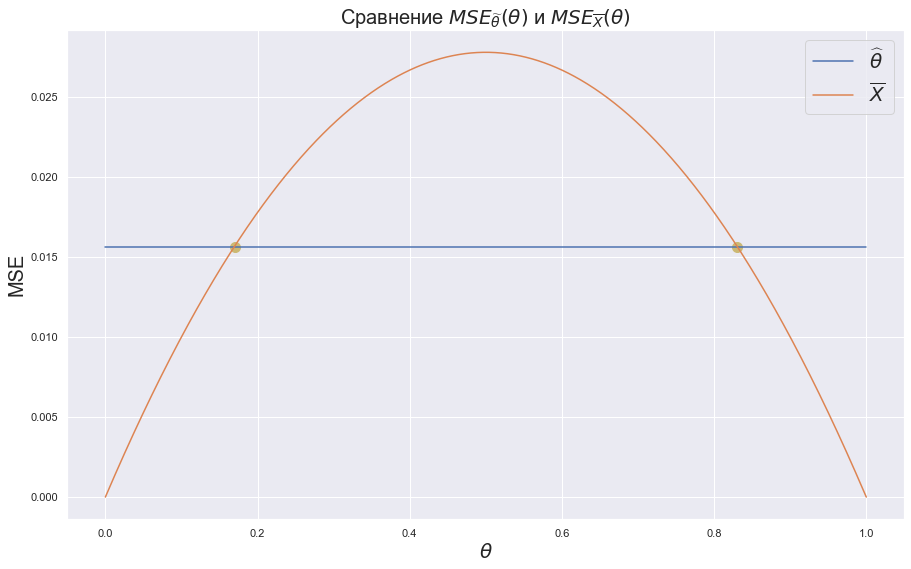

In [67]:
def hodges_Lehmann_estimator(theta):
    return [1/64] * len(theta)

def mean_estimator(theta):
    return theta * (1 - theta)/9

theta = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 9))

plt.plot(theta, hodges_Lehmann_estimator(theta), label=r"$\widehat{\theta}$")
plt.plot(theta, mean_estimator(theta), label=r"$\overline{X} $")
plt.scatter([0.17, 0.83], [1/64, 1/64], color='y', s=100)
plt.xlabel(r"$\theta$", fontsize=20)
plt.ylabel("MSE", fontsize=20)
plt.title(r"Сравнение $MSE_{\widetilde{\theta}} (\theta)$ и $MSE_{\overline{X}} (\theta)$", fontsize=20)
plt.legend(fontsize=20)
plt.show()

**Ответ:** 0.66

*2.* Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение:**

In [56]:
theta = sps.uniform(loc=0, scale=1).rvs(1000)
samples = sps.bernoulli(p=theta.reshape(-1, 1)).rvs(size=(1000, 9))
mean = samples.mean(axis=-1)
hodjes_lehmann = samples.mean(axis=-1) + 1/4 * (1/2 - samples.mean(axis=-1))

result = (np.abs(hodjes_lehmann - theta) < np.abs(mean - theta)).mean()
print("Оценка Ходжеса-Лемана оказалась лучше в доле случаев: {}".format(result))

Оценка Ходжеса-Лемана оказалась лучше в доле случаев: 0.508


**Вывод:** Полученные в 1 и 2 пунктах результаты достаточно сильно отличается. Это связано с тем, что доля $\theta$, где MSE лучше и доля $\theta$, когда лучше приближается истинное значение $\theta$ - разные способы сравнения оценок. На MSE влияет степень отклонения результатов от истинного значения, так как отклонение там возводится в квадрат, а затем усредняется. Для доли случаев, когда одна оценка лучше приближает, чем другая отклонение не влияет никак.

*3.*  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 -\mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрично относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.

Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ оказажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода прямоугольников. Сделайте выводы.

**Решение:**

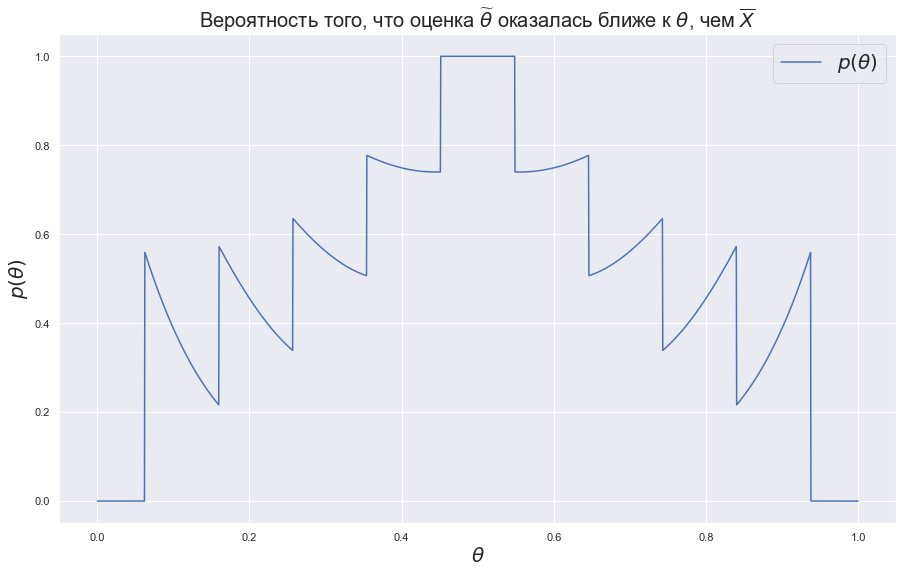

In [165]:
def d_n(n):
    return 1/(4*(1 + np.sqrt(n)))

def p(theta, n=9):
    return 1 - (sps.binom(p=theta, n=n).cdf(n/2) - sps.binom(p=theta, n=n).cdf(n*(theta - d_n(n))/(1 - 2*d_n(n))))

theta = np.linspace(0, 0.5, 1000)

plt.figure(figsize=(15, 9))
plt.plot(np.concatenate((theta, 0.5 + theta)), np.concatenate((p(theta,9), p(0.5 - theta, 9))),
         label = r"$p(\theta)$")
plt.title(r"Вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$",
         fontsize=20)
plt.xlabel(r"$\theta$", fontsize=20)
plt.ylabel(r"$p(\theta)$", fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [166]:
def integrate_rectangle(f, low, high, N):
        """Метод прямоугольников"""
        
        dim = len(high)
        n_rounded =  int(np.power(N, 1./dim)) # количество точек, в которых вычисляем функцию
        diff = (high - low) / n_rounded # длины отрезков разбиения
        # для каждой размерности нашли центры отрезков разбиения 
        centers_of_ranges = np.array([(np.linspace(low[i], high[i], n_rounded + 1)[0:(n_rounded)] + diff[i]/2.) for i in range(dim)])
        centers = np.meshgrid(*centers_of_ranges)  # * передает наш массив как несколько аргументов
        f_vals = f(np.stack(centers).reshape(dim, -1).T) # Получили dim-мерные точки и вычислили функцию в них
        
        return f_vals.sum() * np.prod(diff)

In [167]:
result = 2 * integrate_rectangle(p, np.array([0]), np.array([0.5]), 1000) # в силу симметрии умножаем на 2
print("Искомая вероятность: {}".format(result))

Искомая вероятность: 0.5084898009260396


**Ответ:** Как видим, результаты 1 и 2 пункта достаточно близки. Значит, прошлый пункт подтверждает результат, полученный сейчас.

*4.* Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

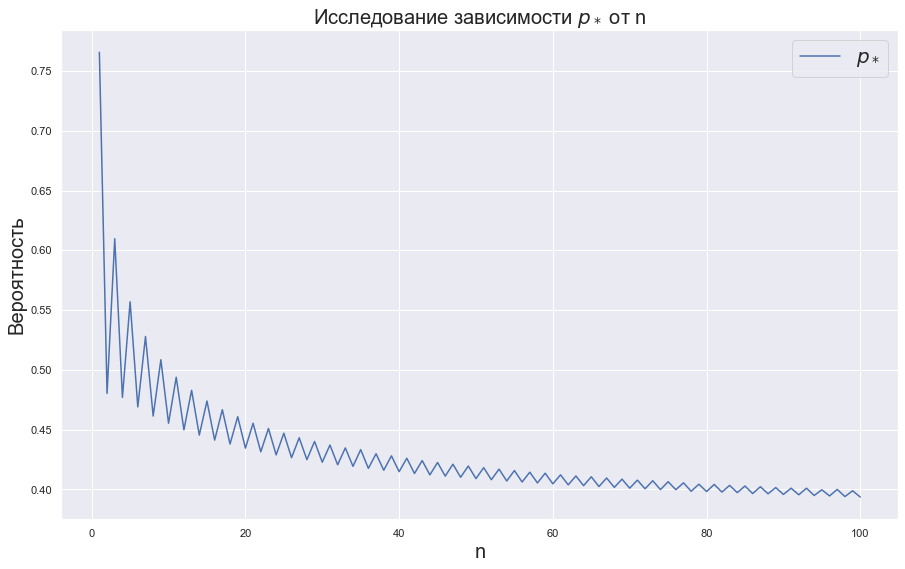

In [177]:
def P(n):
    return 2 * integrate_rectangle(lambda x: p(x, n), np.array([0]), np.array([0.5]), 1000)

n = np.linspace(1, 100, 100)
plt.figure(figsize=(15, 9))

P_ = np.vectorize(P)
plt.plot(n, P_(n), label="$p_*$")
plt.title("Исследование зависимости $p_*$ от n", fontsize=20)
plt.xlabel("n", fontsize=20)
plt.ylabel("Вероятность", fontsize=20)
plt.legend(fontsize=20)
plt.show()

**Ответ:** По графику видно, что вероятность того, что оценка Ходжеса-Лемана оценивает $\theta$ лучше, чем его оценивает выборочное среднее уменьшается с ростом n. При $n \geq 20$ она уже меньше 0.5.

__________________
### Задача 7. Yelp

Yelp (yelp.com) — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате json можно посмотреть по ссылке
https://www.kaggle.com/yelp-dataset/yelp-dataset/data

_____________

**Задача:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. Пример с несколько другой задачей: https://yandex.ru/company/researches/2017/msk_mobile_map
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [213]:
df = pd.read_csv("yelp_business.csv")
df.head()

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`. В таблице должен быть указан город (название) и количество компаний в этом городе.

In [228]:
best_sities = df.groupby(by="city").count().sort_values("business_id", ascending=False)
print(best_sities.business_id.head(5))

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: business_id, dtype: int64


Пусть N -- город с наибольшим количеством компаний.

Оставьте в таблице только записи, соответствующие городу N. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ -- долготу.

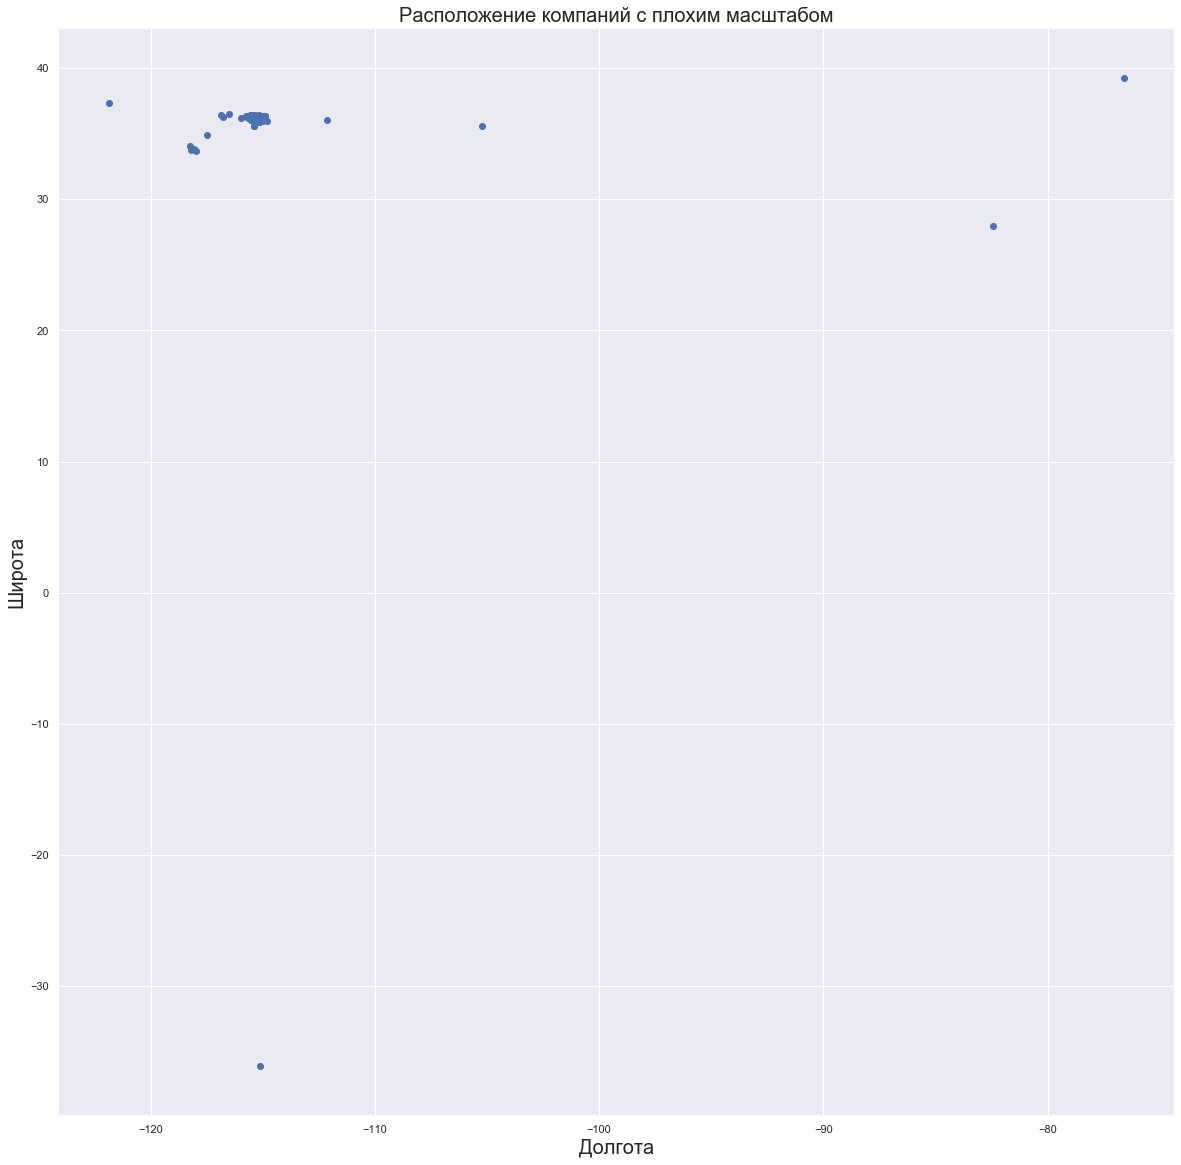

In [249]:
las_vegas = df[df.city=="Las Vegas"].sort_values("latitude")

plt.figure(figsize=(20, 20))
plt.scatter(las_vegas.longitude, las_vegas.latitude)
plt.title("Расположение компаний с плохим масштабом", fontsize=20)
plt.ylabel("Широта", fontsize=20)
plt.xlabel("Долгота", fontsize=20)
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города N и сравните ее с построенным графиком.

При желании вы можете разобраться с тем, как автоматически подгружать карту города в качестве фона графика.

Начнем подбирать пределы:

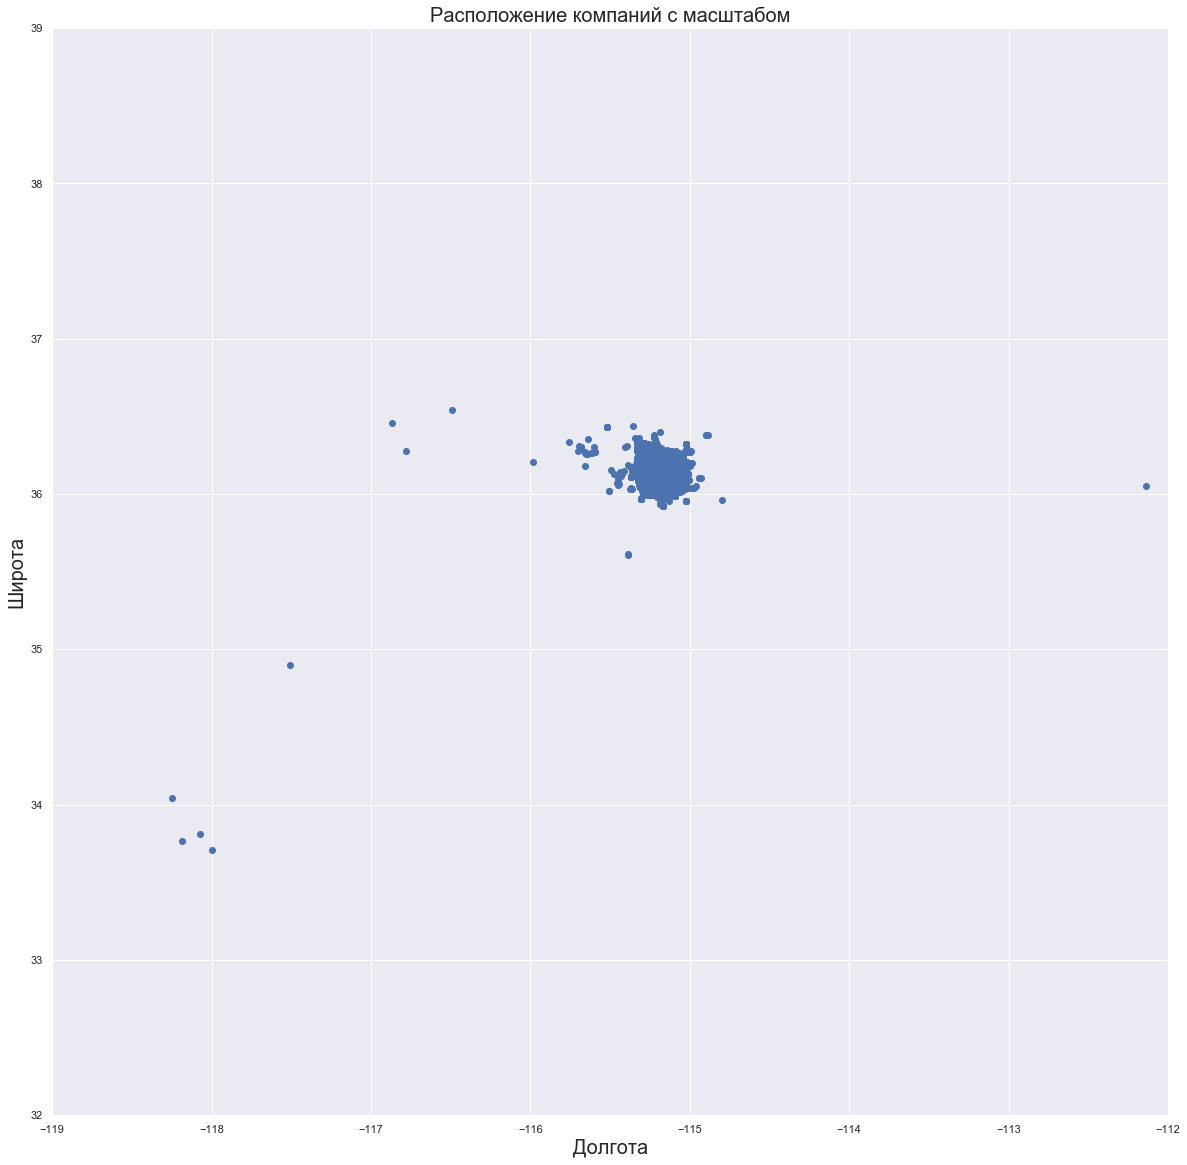

In [248]:
plt.figure(figsize=(20, 20))

plt.scatter(las_vegas.longitude, las_vegas.latitude)
plt.ylim((32, 39))
plt.xlim((-119, -112))

plt.title("Расположение компаний с масштабом", fontsize=20)
plt.ylabel("Широта", fontsize=20)
plt.xlabel("Долгота", fontsize=20)
plt.show()

Все еще нечетко видно, но уже понятнее, какие пределы выбирать:

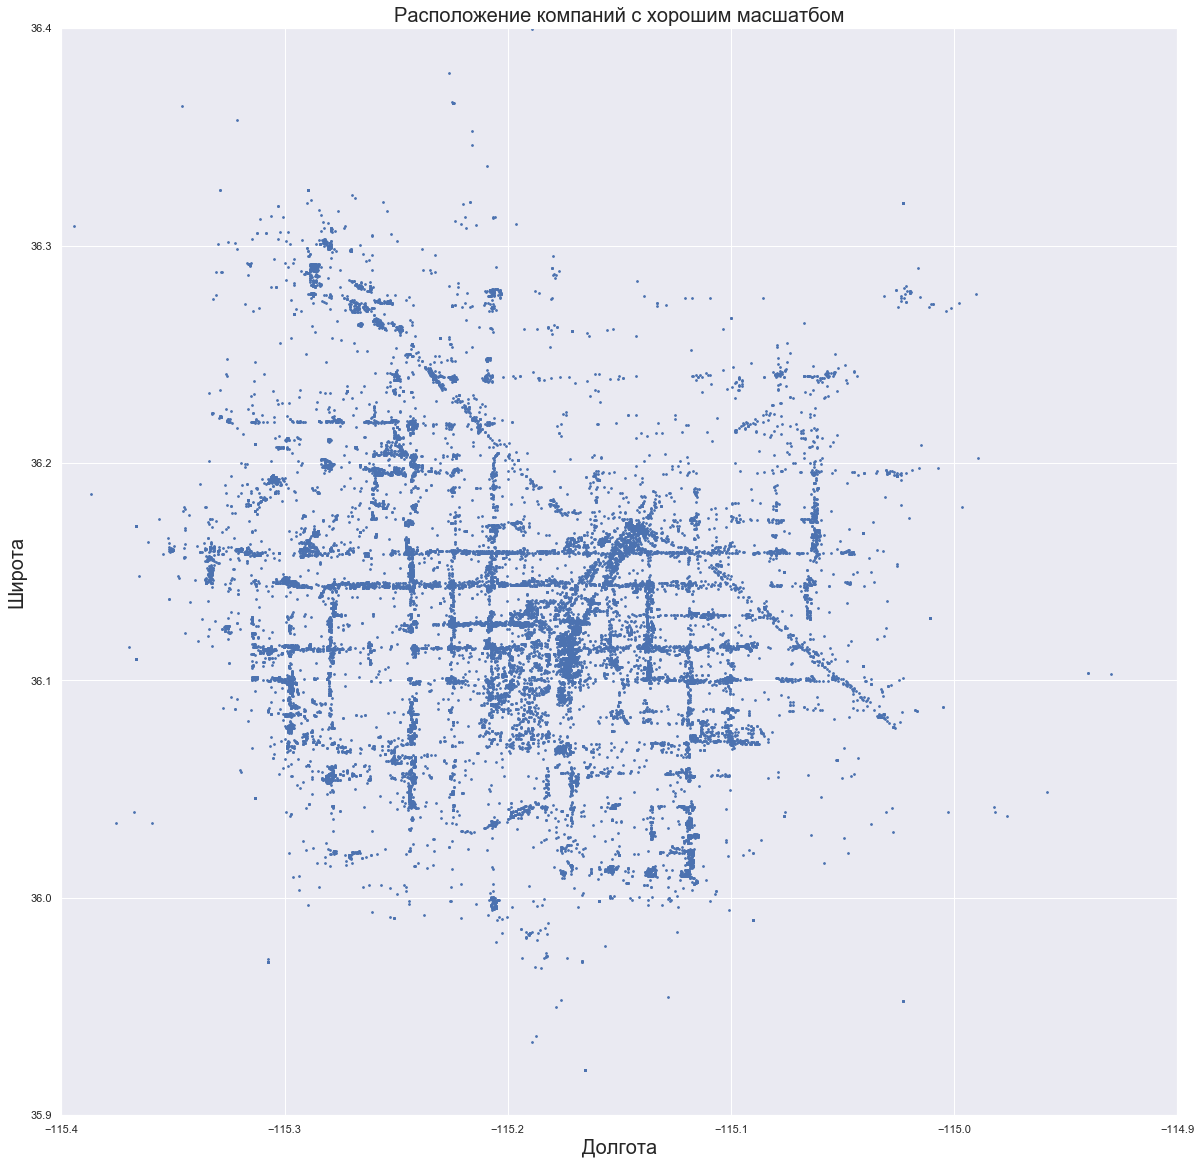

In [294]:
plt.figure(figsize=(20, 20))

plt.scatter(las_vegas.longitude, las_vegas.latitude, s=3)
plt.ylim((35.9, 36.4))
plt.xlim((-115.4, -114.9))

plt.title("Расположение компаний с хорошим масшатбом", fontsize=20)
plt.ylabel("Широта", fontsize=20)
plt.xlabel("Долгота", fontsize=20)
plt.show()

Да, получилось похоже. По крайней мере, явно видна диагональная улица.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [267]:
y_review = pd.read_csv('yelp_review.csv')
y_review.head()

Unnamed: 0             business_id  stars
0           0  AEx2SYEUJmTxVVB18LlCwA      5
1           1  VR6GpWIda3SfvPC-lg9H3w      5
2           2  CKC0-MOWMqoeWf6s-szl8g      5
3           3  ACFtxLv8pGrrxMm6EgjreA      4
4           4  s2I_Ni76bjJNK9yG60iD-Q      4

В подгруженной таблице оценок оставьте только компании города N.
Для этого воспользуйтесь функцией `np.in1d(x, y)`, которая вернет массив того же размера, что и `x`, а на $i$-м месте будет `True`, если элемент `x[i]` встречается в `y`.

*Внимание!* Такая операция может выполняться довольно долго. После выполнения операции можно сохранить ее результат в файл, чтобы в дальнейшем не выполнять ее заново.

Знаем, что N - Las Vegas. Получим уникальные номера компаний Лас Вегаса и компаний, упоминающихся отзывах.

In [290]:
lv = df[df.city == "Las Vegas"]
id_lv = np.array(lv.business_id)
id_review = np.unique(np.array(y_review.business_id))

Получим все id компаний из Лас Вегаса, упоминающихся в отзывах:

In [271]:
good_companies_id = np.in1d(id_review, id_lv)

Пометим как True все отзывы о компаниях из Лас-Вегаса

In [273]:
id_review_lv = id_review[good_companies_id]
review_all_id = np.array(y_review.business_id)
good_rows_id = np.in1d(review_all_id, id_review_lv)

И наконец! Получим все отзывы о компаниях из Лас-Вегаса и сохраним их, чтоб больше не мучиться.

In [283]:
review_lv = y_review[good_rows_id][['business_id', 'stars']]
review_lv.to_csv("review_lv.csv")
review_lv.head()

business_id  stars
5    8QWPlVQ6D-OExqXoaD2Z1g      5
87   pLZ9oZM8c6MNbRlg06lBPg      1
105  6Q7-wkCPc1KF75jZLOTcMw      2
122  9Jc3W0aR9Xf2gcHI0rEXsw      1
123  xVEtGucSRLk5pxxN0t4i6g      5

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [284]:
stats = review_lv.groupby(by='business_id').aggregate([np.mean, np.size])
stats.head()

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы.

In [285]:
stats.columns = ["stars", "count"] # вы же сами указали эти названия ниже
stats.head()

stars  count
business_id                            
--9e1ONYQuAa-CB_Rrw7Tw  4.088904   1451
--DdmeR16TRb3LsjG0ejrQ  3.200000      5
--WsruI0IGEoeRmkErU5Gg  4.928571     14
--Y7NhBKzLTbNliMUX_wfg  4.875000      8
--e8PjCNhEz32pprnPhCwQ  3.473684     19

Соедините две полученные ранее таблицы по компаниям города N в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [292]:
lv_i = lv.set_index("business_id")
companies = lv_i.join(stats, how="inner")[['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]
companies.head()

latitude   longitude  \
business_id                                     
kCoE3jvEtg6UVz5SOD3GVw  36.207430 -115.268460   
OD2hnuuTJI9uotcKycxg1A  36.197484 -115.249660   
VBHEsoXQb2AQ76J9l8h1uQ  36.085051 -115.119421   
1Jp_hmPNUZArNqzpbm7B0g  36.056382 -115.269332   
DPQnTnNw2PJj7DdENM98Cw  36.105196 -115.056880   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
VBHEsoXQb2AQ76J9l8h1uQ       Shopping;Jewelry;Watch Repair;Local Services   
1Jp_hmPNUZArNqzpbm7B0g  Home Services;Lighting Fixtures & Equipment;Lo...   
DPQnTnNw2PJj7DdENM98Cw       Nurseries & Gardening;Home & Garden;Shopping   

                                       name     stars  count  
business_id                                                   
kCoE3jvEtg6UVz5SOD3GVw         "BDJ Realty"  4.000000      5  
OD2hnuuTJI9uotcKycxg1A        "Soccer Zone"  1.444444      9  
VBHEsoXQb2AQ76J9l8h1uQ  "Alfredo's Jewelry"  4.739130     23  
1Jp_hmPNUZArNqzpbm7B0g      "Task Electric"  4.450000     20  
DPQnTnNw2PJj7DdENM98Cw       "Star Nursery"  3.680000     25

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

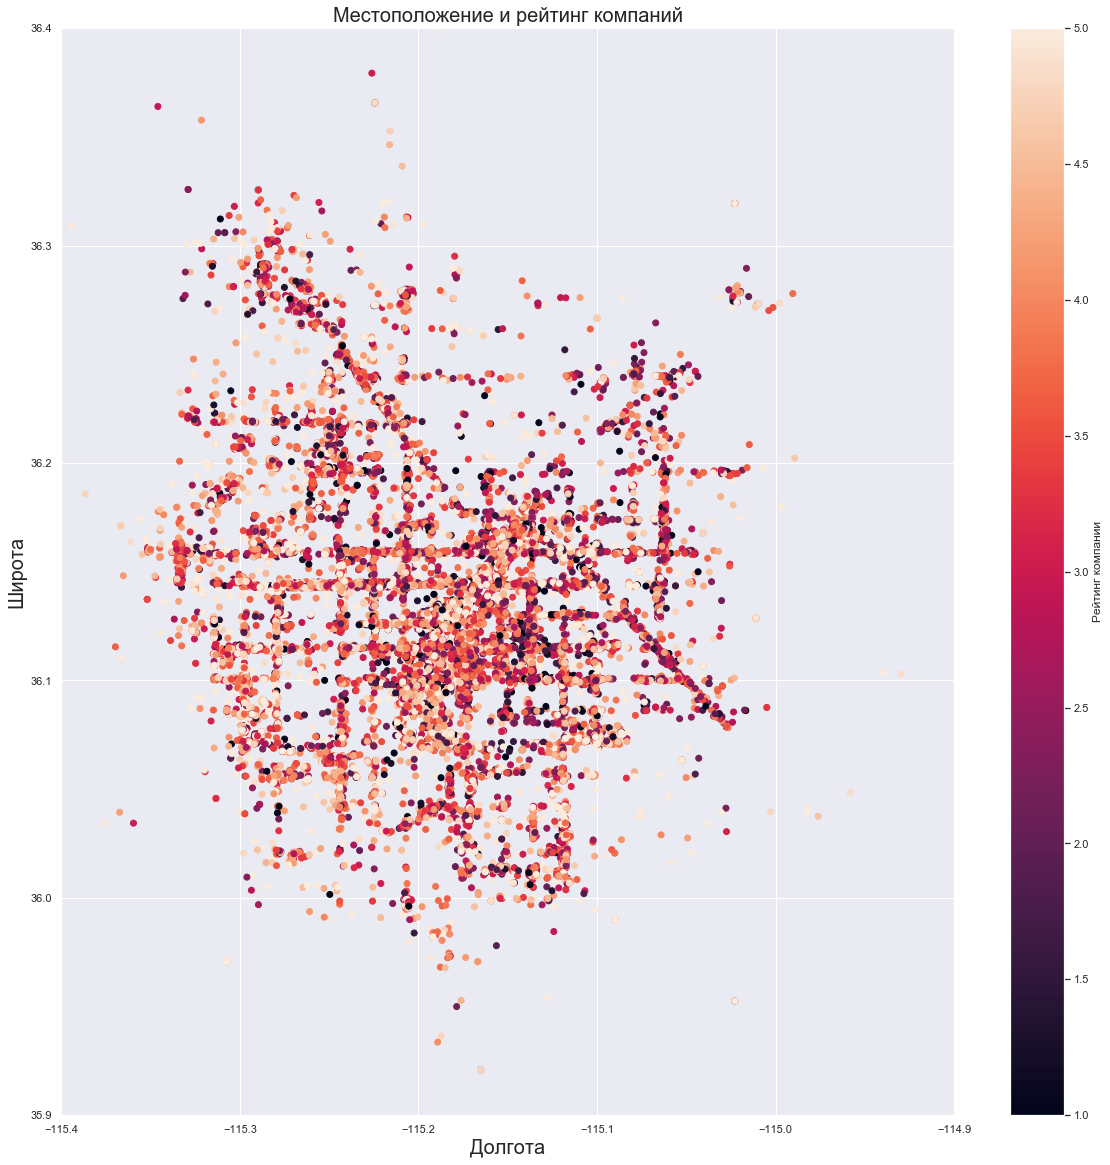

In [305]:
plt.figure(figsize=(20, 20))
plt.colorbar( plt.scatter(companies.longitude, companies.latitude, c=companies.stars),
             label="Рейтинг компании")

plt.ylim((35.9, 36.4))
plt.xlim((-115.4, -114.9))

plt.title("Местоположение и рейтинг компаний", fontsize=20)
plt.ylabel("Широта", fontsize=20)
plt.xlabel("Долгота", fontsize=20)
plt.show()

Чтобы получить районы города, округлите значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [311]:
companies["latitude"] = companies["latitude"].apply(lambda x : np.round(x*4, decimals=1)*0.25)
companies["longitude"] = companies["longitude"].apply(lambda x : np.round(x*4, decimals=1)*0.25)
companies.head()

latitude  longitude  \
business_id                                   
kCoE3jvEtg6UVz5SOD3GVw    36.200   -115.275   
OD2hnuuTJI9uotcKycxg1A    36.200   -115.250   
VBHEsoXQb2AQ76J9l8h1uQ    36.075   -115.125   
1Jp_hmPNUZArNqzpbm7B0g    36.050   -115.275   
DPQnTnNw2PJj7DdENM98Cw    36.100   -115.050   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
VBHEsoXQb2AQ76J9l8h1uQ       Shopping;Jewelry;Watch Repair;Local Services   
1Jp_hmPNUZArNqzpbm7B0g  Home Services;Lighting Fixtures & Equipment;Lo...   
DPQnTnNw2PJj7DdENM98Cw       Nurseries & Gardening;Home & Garden;Shopping   

                                       name     stars  count  
business_id                                                   
kCoE3jvEtg6UVz5SOD3GVw         "BDJ Realty"  4.000000      5  
OD2hnuuTJI9uotcKycxg1A        "Soccer Zone"  1.444444      9  
VBHEsoXQb2AQ76J9l8h1uQ  "Alfredo's Jewelry"  4.739130     23  
1Jp_hmPNUZArNqzpbm7B0g      "Task Electric"  4.450000     20  
DPQnTnNw2PJj7DdENM98Cw       "Star Nursery"  3.680000     25

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

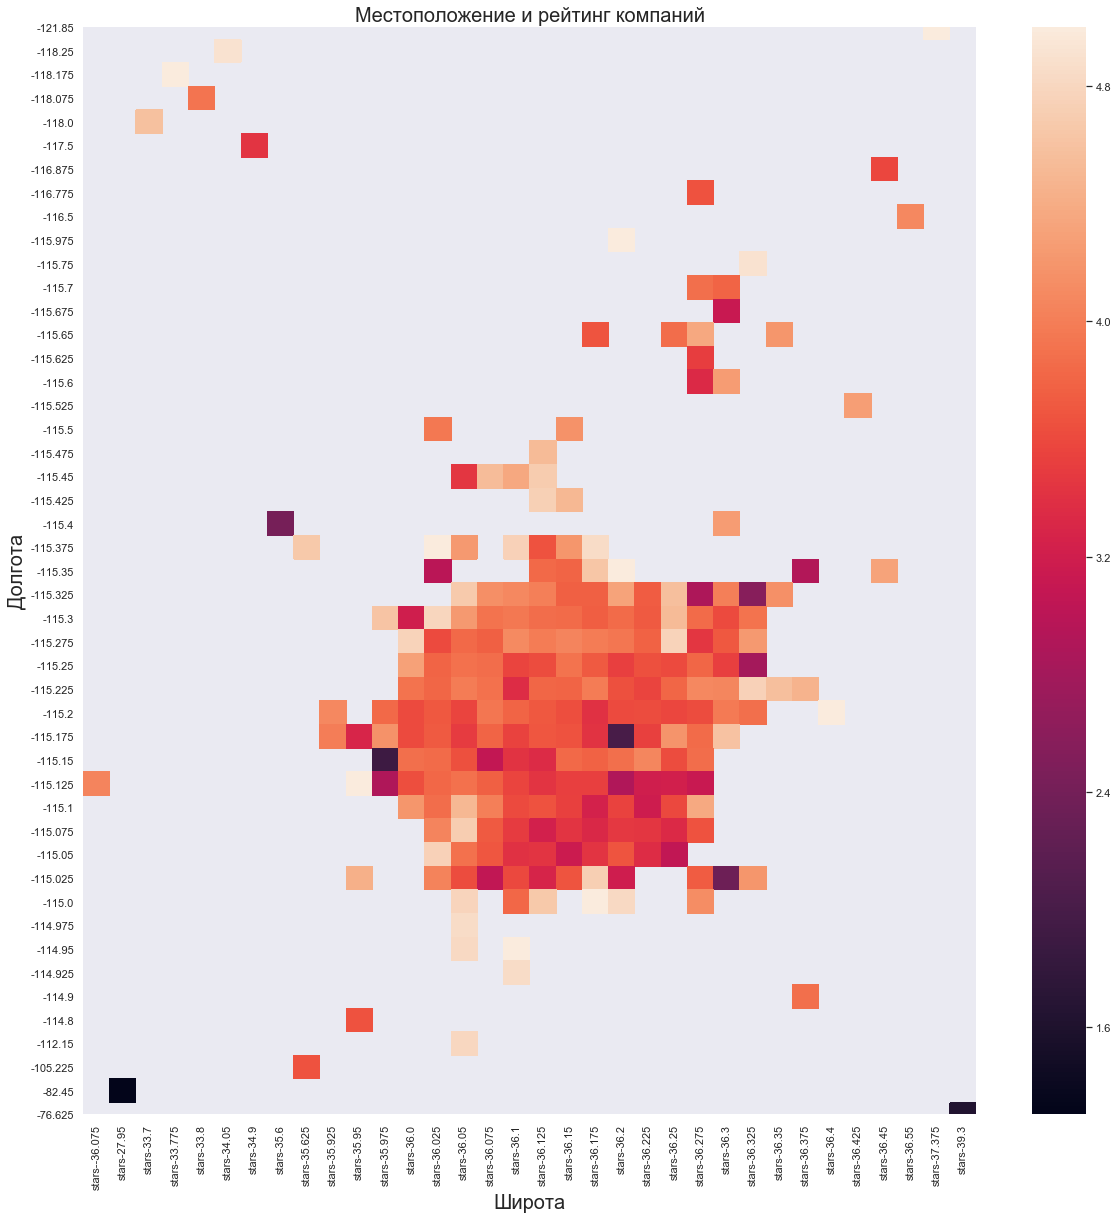

In [330]:
pivot_cmp = pd.pivot_table(companies, columns=["latitude",], index=["longitude",], values=["stars",], aggfunc=np.mean)
plt.figure(figsize=(20, 20))

sns.heatmap(pivot_cmp)

plt.title("Местоположение и рейтинг компаний", fontsize=20)
plt.xlabel("Широта", fontsize=20)
plt.ylabel("Долгота", fontsize=20)
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 

1. На нашем графике районы с маленьким числом компаний и с большим неотличимы. Например, если жителям бедного района нравится местная забегаловка, и они оценили ее единогласно в 5 баллов, то это совсем не значит, что стоит сюда приезжать, чтобы вкусно покушать. И наоборот, район с сотней ресторанов и средним баллом 4 гораздо лучший выбор.

2. О маленькой компании скорее всего будет мало отзывов, и есть шанс, что ее оценка будет близка к 5 или 1, например. При этом, такая оценка повлияет на все остальные, и на графике будет казаться, что все другие регионы сильно хуже.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

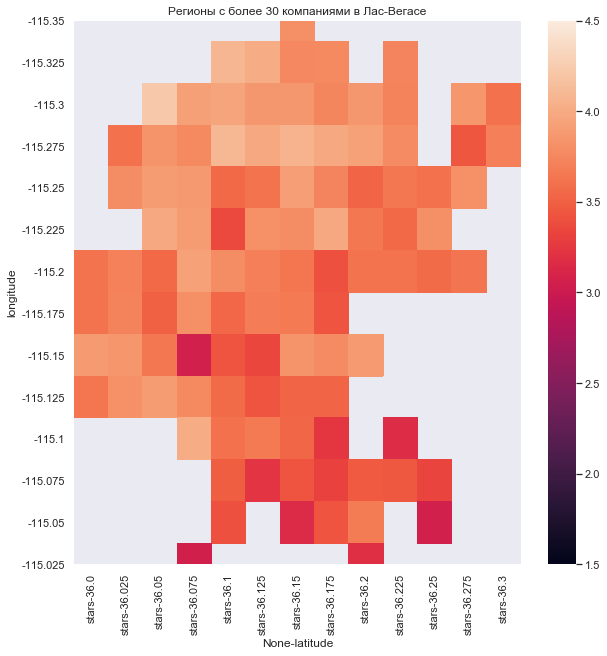

In [376]:
region_count_comp = companies.groupby(by=['latitude', 'longitude']).count()
good_regions = region_count_comp[region_count_comp["count"] > 29]
good_regions = good_regions.rename(columns={'count' : 'num'}) # совпадали названия
finish_comp = companies.join(good_regions["num"], how="inner", on=["latitude", "longitude"])
finish_comp.head()

plt.figure(figsize=(10, 10))
pivot_rest = pd.pivot_table(finish_comp, columns=['latitude'], index=['longitude'],
                            values=['stars'], aggfunc=np.mean)
sns.heatmap(pivot_rest, vmin=1.5, vmax=4.5)
plt.title("Регионы с более 30 компаниями в Лас-Вегасе")
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Такой график гораздо нагляднее, в нем меньше перепады цвета, за счет чего информация воспринимается легче и без скептицизма. Также, график стал более центрирован за счет удаления маленьким компаний.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составьте таблицу, в которой будет информация о всех ресторанах города N, для которых имеется не менее $5$ отзывов. Далее постройте график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [342]:
restaurants = companies[companies.categories.str.contains("Restaurant")]
restaurants = restaurants[restaurants["count"] > 4]

region_count_rest = restaurants.groupby(by=['latitude', 'longitude']).count()
count_rest.head()

categories  name  stars  count
latitude longitude                                
35.925   -115.175            1     1      1      1
35.975   -115.200            4     4      4      4
         -115.175            1     1      1      1
         -115.150            1     1      1      1
36.000   -115.250            1     1      1      1

In [341]:
good_regions = region_count_rest[region_count_rest["count"] > 9]
good_regions = good_regions.rename(columns={'count' : 'num'}) # совпадали названия
finish_rest = restaurants.join(good_regions["num"], how="inner", on=["latitude", "longitude"])
finish_rest.head()

latitude  longitude  \
business_id                                   
Pd52CjgyEU3Rb8co6QfTPw    36.075   -115.175   
n7V4cD-KqqE3OXk0irJTyA    36.075   -115.175   
FT99KLluYZA7vFZEIypIwQ    36.075   -115.175   
m5niZy68d2gTtVWz89elfA    36.075   -115.175   
hYX0z2C6Th5XmcrKOP31fQ    36.075   -115.175   

                                                               categories  \
business_id                                                                 
Pd52CjgyEU3Rb8co6QfTPw  Nightlife;Bars;Barbeque;Sports Bars;American (...   
n7V4cD-KqqE3OXk0irJTyA  Arcades;Arts & Entertainment;Gastropubs;Restau...   
FT99KLluYZA7vFZEIypIwQ           Food;Desserts;Restaurants;American (New)   
m5niZy68d2gTtVWz89elfA   Restaurants;Food Trucks;Food Stands;Food;Burgers   
hYX0z2C6Th5XmcrKOP31fQ  Bars;Restaurants;Tapas/Small Plates;American (...   

                                                        name     stars  count  \
business_id                                                                     
Pd52CjgyEU3Rb8co6QfTPw             "Flight Deck Bar & Grill"  3.769231     13   
n7V4cD-KqqE3OXk0irJTyA                           "GameWorks"  3.117479    349   
FT99KLluYZA7vFZEIypIwQ                     "Fracos & Froccs"  3.727273     11   
m5niZy68d2gTtVWz89elfA                         "Slidin Thru"  4.000000    364   
hYX0z2C6Th5XmcrKOP31fQ  "Double Helix Wine & Whiskey Lounge"  3.843949    314   

                        num  
business_id                  
Pd52CjgyEU3Rb8co6QfTPw   50  
n7V4cD-KqqE3OXk0irJTyA   50  
FT99KLluYZA7vFZEIypIwQ   50  
m5niZy68d2gTtVWz89elfA   50  
hYX0z2C6Th5XmcrKOP31fQ   50

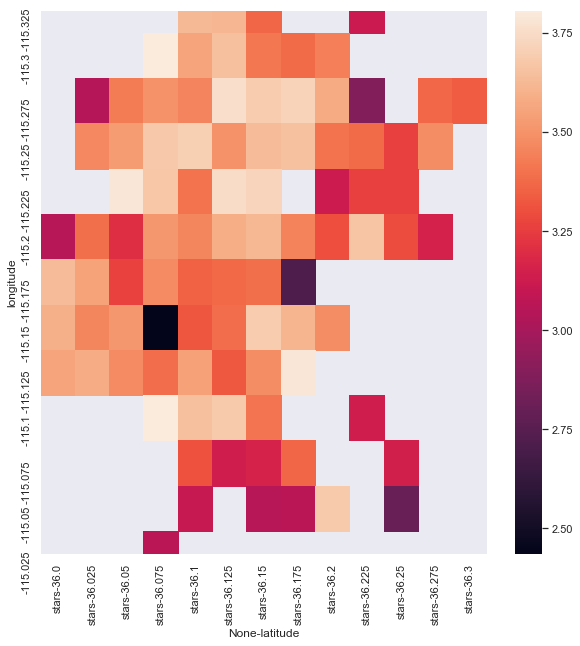

In [347]:
plt.figure(figsize=(10, 10))
pivot_rest = pd.pivot_table(finish_rest, columns=['latitude'], index=['longitude'],
                            values=['stars'], aggfunc=np.mean)
sns.heatmap(pivot_rest)
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Маленькое количество отзывов не дает объективной оценки ресторана, велик шанс того, что на самом деле впечатления о ресторане совсем обратные. По поводу количества я расписывал в прошлом выводе - большое количество ресторанов в районе дает больший выбор, а если средняя оценка на них достаточно хорошая, то этот район полон множества разнообразных ресторанов, туда можно пойти и покушать разные кухни мира.

Кот Василий из таблицы с баллами очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [355]:
cat_rest = restaurants[restaurants["count"] > 49].sort_values(by="stars", ascending=False)
cat_rest.head(10).set_index("name")

latitude  longitude  \
name                                                 
"Lip Smacking Foodie Tours"      36.125   -115.175   
"Pepito Shack"                   36.150   -115.150   
"Bosa Boba Cafe"                 36.125   -115.175   
"Garden Grill"                   36.175   -115.275   
"Brew Tea Bar"                   36.050   -115.250   
"Poppa Naps BBQ"                 36.125   -115.100   
"Zenaida's Cafe"                 36.100   -115.100   
"El Frescos Cocina Mexicana"     36.100   -115.150   
"Blaqcat Ultra Hookah Lounge"    36.150   -115.225   
"California Sushi Burrito"       36.125   -115.200   

                                                                      categories  \
name                                                                               
"Lip Smacking Foodie Tours"    Food Tours;Restaurants;Event Planning & Servic...   
"Pepito Shack"                 Restaurants;Burgers;Food Stands;Sandwiches;Hot...   
"Bosa Boba Cafe"               Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...   
"Garden Grill"                 Tacos;Street Vendors;Farmers Market;Vegetarian...   
"Brew Tea Bar"                 Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...   
"Poppa Naps BBQ"               Food Stands;Hot Dogs;Caterers;Restaurants;Amer...   
"Zenaida's Cafe"                            Restaurants;Breakfast & Brunch;Cafes   
"El Frescos Cocina Mexicana"   Caterers;Mexican;Restaurants;Food;Event Planni...   
"Blaqcat Ultra Hookah Lounge"  Adult Entertainment;Lounges;Hookah Bars;Restau...   
"California Sushi Burrito"     Asian Fusion;Fast Food;Restaurants;Japanese;Po...   

                                  stars  count  
name                                            
"Lip Smacking Foodie Tours"    4.966480    179  
"Pepito Shack"                 4.907692     65  
"Bosa Boba Cafe"               4.890909     55  
"Garden Grill"                 4.868132     91  
"Brew Tea Bar"                 4.848069   1165  
"Poppa Naps BBQ"               4.836538    104  
"Zenaida's Cafe"               4.833333    180  
"El Frescos Cocina Mexicana"   4.816754    191  
"Blaqcat Ultra Hookah Lounge"  4.809524     63  
"California Sushi Burrito"     4.807018     57

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

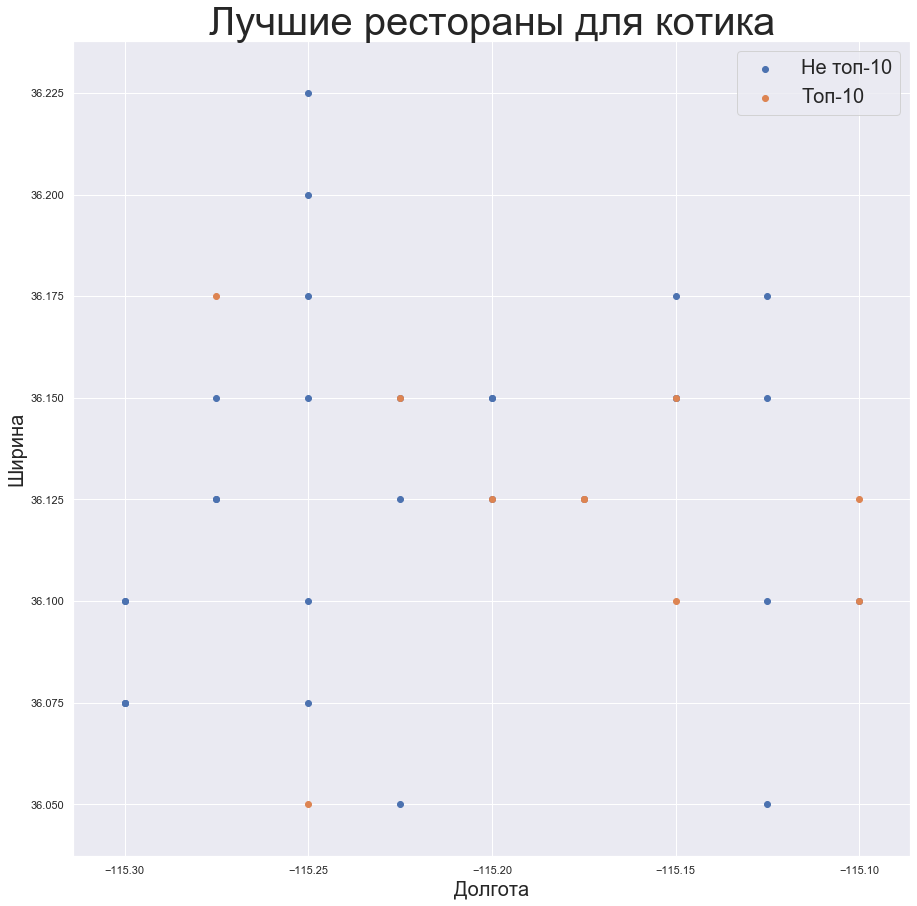

In [371]:
cat_best_rest = cat_rest[cat_rest.stars >= 4.7].sort_values(by="stars")
plt.figure(figsize=(15, 15))
plt.scatter(cat_best_rest[0:-10].longitude, cat_best_rest[0:-10].latitude,
                                                          label="Не топ-10")
plt.scatter(cat_rest[0:10].longitude, cat_rest[0:10].latitude,
                                                          label="Топ-10")
plt.title("Лучшие рестораны для котика", fontsize=40)
plt.legend(fontsize=20)
plt.xlabel("Долгота", fontsize=20)
plt.ylabel("Ширина", fontsize=20)
plt.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Для кота Василия найдется порядка 25 ресторанов, которые его устроят. Рестораны расположены в принципе почти по всему городу, поэтому кот Василий может найти себе место, где покушать, почти в любой части города.

C помощью pandas-а мы смогли "создавать свои критерии выброса" для каждой из задач, что помогало нам в дальнейшем эффективнее работать с задачей. Так же, pandas оказался хорошим инструментов для работы с данными, а sns - очень наглядно иллюстрировал данные.